# ⚡ **EGS Ecosystem Intelligence: Strategic Market Audit (2025)**
### **Principal Data Scientist & UXR Consultant Portfolio Piece**

![Project Cover](../portfolio_assets/epic_cover_2.jpg)

- **Principal Data Scientist:** Eduardo Cornelsen 
- **Methodology:** *K-Means Clustering, NLP (LDA & Sentiment), Random Forest Regression, Seasonal Trend Analysis.*
---

## 🌐 Project Context
As the digital storefront landscape becomes increasingly competitive, understanding the interplay between **Technical Requirements**, **Pricing Strategy**, and **Critic Sentiment** is vital for the Epic Games Store (EGS). This notebook serves as a multi-dimensional audit of the EGS catalog to identify growth opportunities and user experience (UX) friction points.

## 🎯 Analytical Objectives
The goal of this research is to bridge the gap between "Raw Metadata" and "Actionable Strategy" through three primary lenses:
1.  **Market Taxonomy:** Using **Unsupervised Machine Learning (K-Means)** to segment the store into 4 distinct "Product Personas."
2.  **Quality Drivers:** Implementing **Random Forest Regression** to determine how much of a game's critical success ($R^2$) is tied to hardware accessibility vs. intangible UX factors.
3.  **The Critic’s Voice:** Utilizing **Natural Language Processing (NLP)** and **Hypothesis Testing** to decode the specific vocabulary of success and failure in professional reviews.
4.  **Operational Seasonality:** Identifying temporal "Quality Traps" to optimize the store's release and featuring calendar.

## 🛠️ Technical Methodology
*   **Data Engineering:** Robust cross-table merging and optimization of an 80MB relational dataset (900+ titles, 1M+ social signals).
*   **NLP Pipeline:** VADER Sentiment Analysis and LDA Topic Modeling on marketing descriptions and critic comments.
*   **Statistics:** Chi-Square Independence tests and Welch’s T-Tests to validate qualitative findings.
*   **Visualization:** Interactive **Plotly** and **Seaborn** suite styled with a "Cyberpunk/Dark Mode" aesthetic for executive presentations.

---
**Note:** *The Executive Summary of findings is provided immediately below, followed by the supporting technical evidence and code.*

---

# 🚀 **Executive Summary: Epic Games Store Strategic Audit (2025)**

## 📊 1. The Analytical Core: Predicting Success
Our analysis utilized a **Random Forest Regressor** to determine the drivers of game quality (Critic Ratings).
*   **The Result:** We achieved an **$R^2$ score of 0.392**, meaning nearly **40% of a game's success** can be predicted via Price, Hardware Reqs, and Market Segment.
*   **The UXR Insight:** The remaining 60% represents the "Intangible UX"—art direction, narrative resonance, and mechanical polish—proving that while specs matter, **User Experience is the ultimate "Alpha" for store success.**

## 🟢 2. The Opportunity: "Niche Premium" (Cluster 3)
Our K-Means clustering identified a high-efficiency segment: **Premium Low-Spec** titles.
*   **Data:** These titles command high prices (~$26) despite ultra-low hardware requirements (<3GB RAM) and maintain elite ratings (75+).
*   **Strategic Action:** Modify the Store Algorithm to boost visibility for these "Premium Indies." They offer the lowest friction for the user (accessible hardware) and the highest margin for the business.

## 🔴 3. The Risk: The "Hardware Wall" (Cluster 0)
We identified a critical failure point at the **8GB RAM threshold**.
*   **Data:** High-spec games with ratings below 60/100 create a "churn zone." Players invest in expensive hardware but receive unoptimized experiences.
*   **Strategic Action:** Implement a **"Performance Certification"** badge. Games requiring >8GB RAM must pass a stability QA check to be eligible for homepage featuring, protecting the store's reputation.

## 🗓️ 4. Seasonality: The "October Quality Trap"
Temporal analysis reveals a significant **Quality Gap** during the Q4 holiday rush.
*   **Data:** While release volume peaks in October/November, average ratings take an aggressive dive. Conversely, **April** emerges as a "Masterpiece Window" with high ratings and low competition.
*   **UXR Strategy:** Recommend that high-potential Indie partners avoid the "October Crunch." We should incentivize **"Spring Discovery"** events to feature gems when they have the airtime to be noticed.

## 🤝 5. Community Strategy: The "Connectivity" Premium
Ecosystem breadth is the strongest social predictor of high ratings.
*   **Data:** Games linked to **5+ platforms** (Discord + Twitch + Youtube) score significantly higher than those with a siloed presence.
*   **Action:** Integrate Discord linking directly into the Developer Portal. A "Community Hub" presence is a proxy for developer care and a primary defense against player churn.

---
- **Principal Data Scientist:** Eduardo Cornelsen 
- **Methodology:** *K-Means Clustering, NLP (LDA & Sentiment), Random Forest Regression, Seasonal Trend Analysis.*

In [1]:
# TODO for each viz, insert the real image
# FOR each graph, insert the STORYTELLING TITLE -> factual review

In [2]:
# ==============================================================================
# BLOCK 1: ENVIRONMENT SETUP & VISUAL IDENTITY
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings
from IPython.display import display, Markdown
from tabulate import tabulate

# Scikit-Learn: Preprocessing & Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Scikit-Learn: Methodology Imports
# PCA: Used for dimensionality reduction while preserving maximum variance.
from sklearn.decomposition import PCA 

# Latent Dirichlet Allocation (LDA): A generative statistical model for topic modeling in NLP.
from sklearn.decomposition import LatentDirichletAllocation 

# K-Means: A centroid-based clustering algorithm used to partition data into K distinct groups.
from sklearn.cluster import KMeans 

# Random Forest Regressor: An ensemble learning method using multiple decision trees for regression.
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# XGBoost (Extreme Gradient Boosting): An optimized distributed gradient boosting library, highly efficient for tabular data.
import xgboost as xgb

# SHAP (SHapley Additive exPlanations): A game-theoretic approach to interpret model predictions and visualize feature importance.
import shap

# Cosine Similarity: A metric that calculates the cosine of the angle between vectors to determine similarity, used for the Recommendation Engine.
from sklearn.metrics.pairwise import cosine_similarity

# Feature Extraction & Metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score

import scipy.cluster.hierarchy as sch

# Hypothesis testing
# T-Test: Compares the means of two independent groups.
# Chi-Square: Tests the association between categorical variables.
from scipy.stats import ttest_ind, chi2_contingency

# NLP Sentiment & Visualization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
try:
    nltk.data.find('vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon', quiet=True)

# Wordcloud
from wordcloud import WordCloud, STOPWORDS

# Quality of Life Settings
warnings.filterwarnings('ignore')
%matplotlib inline


# ------------------------------------------------------------------------------
# CYBERPUNK VISUAL IDENTITY CONFIGURATION
# ------------------------------------------------------------------------------
# Palette: Background #080808, Primary #00ffcc (Teal), Secondary #ff00ff (Magenta)
plt.style.use('dark_background')

CYBER_PALETTE = {
    'bg': '#080808',
    'primary': '#00ffcc',
    'secondary': '#ff00ff',
    'accent': '#ffff00',
    'text': '#ffffff',
    'grid': '#333333'
}

sns.set_context("notebook", font_scale=1.1)
plt.rcParams.update({
    "figure.facecolor": CYBER_PALETTE['bg'],
    "axes.facecolor": CYBER_PALETTE['bg'],
    "axes.edgecolor": CYBER_PALETTE['primary'],
    "grid.color": CYBER_PALETTE['grid'],
    "grid.linestyle": ":",
    "text.color": CYBER_PALETTE['text'],
    "xtick.color": CYBER_PALETTE['text'],
    "ytick.color": CYBER_PALETTE['text'],
    "axes.labelcolor": CYBER_PALETTE['primary'],
    "axes.titlecolor": CYBER_PALETTE['secondary']
})

warnings.filterwarnings('ignore')
print(">> System Initialized: Cyberpunk Visual Core Online.")

>> System Initialized: Cyberpunk Visual Core Online.


In [3]:
# ==============================================================================
# BLOCK 2: PHASE 0 - DATA AUDIT, LOADING & INITIAL CLEANING
# ==============================================================================

def load_and_optimize(file_path, dtypes=None, parse_dates=None):
    """
    Loads CSV with memory optimization and handles common date parsing errors.
    """
    try:
        # Attempt load
        df = pd.read_csv(file_path, dtype=dtypes, parse_dates=parse_dates)
        
        # Memory Optimization: Convert objects to categories
        for col in df.select_dtypes(include='object'):
            if len(df[col].unique()) / len(df) < 0.5:
                df[col] = df[col].astype('category')
                
        print(f"[{file_path}] Loaded successfully. Shape: {df.shape}")
        return df

    except ValueError as e:
        print(f"Error loading {file_path}: {e}")
        return None
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
        return None

# 1. Load Data (Using correct schemas immediately)
print(">> Loading Datasets...")
game_dtypes = {'price': 'float32'} 

# Note: We use 'join_date' for Twitter Accounts matching the ERM schema
games = load_and_optimize('../data/games.csv', dtypes=game_dtypes, parse_dates=['release_date'])
hardware = load_and_optimize('../data/necessary_hardware.csv')
social = load_and_optimize('../data/social_networks.csv')
tw_accounts = load_and_optimize('../data/twitter_accounts.csv', parse_dates=['join_date']) 
tweets = load_and_optimize('../data/tweets.csv', parse_dates=['timestamp'])
critic = load_and_optimize('../data/open_critic.csv', parse_dates=['date'])

# ------------------------------------------------------------------
# 2. IMMEDIATE FEATURE ENGINEERING (GAMES)
# ------------------------------------------------------------------
print("\n>> Applying Game Feature Transformations...")

# A. Handle Dates
# Convert release_date to datetime and extract year
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')
games['release_year'] = games['release_date'].dt.year

# B. Handle Price
# Fill nan values in pricing with the median if needed
median_price = games['price'].median()
games['price'] = games['price'].fillna(median_price)

# Divide all price by 100 to get the true value (e.g., 1999 -> 19.99)
games['price'] = games['price'] / 100

print(f"   -> Year extracted. Prices normalized (Sample: {games['price'].iloc[0]} USD).")

# C. Handle Missing Genres
games['genres'] = games['genres'].fillna('Unknown')

# ------------------------------------------------------------------
# 3. IMMEDIATE CLEANING (TWEETS)
# ------------------------------------------------------------------
if tweets is not None:
    initial_len = len(tweets)
    # Drop rows where critical IDs or Text are missing
    tweets = tweets.dropna(subset=['text', 'twitter_account_id', 'id'])
    # Drop duplicates
    tweets = tweets.drop_duplicates()
    print(f">> Cleaned Tweets. Dropped {initial_len - len(tweets)} rows (Nulls/Dupes).")

# ------------------------------------------------------------------
# 4. ENHANCED AUDIT FUNCTION
# ------------------------------------------------------------------
def audit_data(name, df):
    if df is None: return
    print(f"\n{'='*40}")
    print(f" AUDIT REPORT: {name}")
    print(f"{'='*40}")
    
    # 1. Info (Structure & Memory)
    print(f"[DataFrame Info]:")
    df.info()
    
    # 2. Missing Values
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\n[Missing Values]:\n{missing}")
    else:
        print("\n[Missing Values]: None")
    
    # 3. Duplicates
    dupes = df.duplicated().sum()
    print(f"\n[Duplicates]: {dupes}")

# Run Audit
audit_data("Games", games)
audit_data("Twitter Accounts", tw_accounts)
audit_data("Tweets", tweets)

>> Loading Datasets...
[../data/games.csv] Loaded successfully. Shape: (915, 10)
[../data/necessary_hardware.csv] Loaded successfully. Shape: (1765, 6)
[../data/social_networks.csv] Loaded successfully. Shape: (3045, 4)
[../data/twitter_accounts.csv] Loaded successfully. Shape: (529, 11)
[../data/tweets.csv] Loaded successfully. Shape: (989515, 11)
[../data/open_critic.csv] Loaded successfully. Shape: (17584, 8)

>> Applying Game Feature Transformations...
   -> Year extracted. Prices normalized (Sample: 19.989999771118164 USD).
>> Cleaned Tweets. Dropped 34 rows (Nulls/Dupes).

 AUDIT REPORT: Games
[DataFrame Info]:
<class 'pandas.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            915 non-null    str                
 1   name          915 non-null    str                
 2   game_slug     915 non-null    str                
 3   p

In [4]:
# ==============================================================================
# BLOCK 3 (REVISED): PHASE 1 - STRATEGIC DATA ENGINEERING (NO TWEETS)
# ==============================================================================

print(">> Starting Streamlined Data Engineering (Skipping flawed Tweet data)...")

# 1. HELPER: Auto-Detect Game ID Column
def get_game_id_col(df, table_name):
    candidates = ['fk_game_id', 'game_id', 'Game ID', 'Game_ID', 'fk_game']
    for col in candidates:
        if col in df.columns:
            print(f">> [{table_name}] Found Link Column: '{col}'")
            return col
    return None

# ------------------------------------------------------------------
# PART A: PREPARE HARDWARE DATA
# ------------------------------------------------------------------
print(">> Processing Hardware Requirements...")
def extract_ram(text):
    if pd.isna(text): return np.nan
    text = str(text).upper()
    match_gb = re.search(r'(\d+)\s?GB', text)
    if match_gb: return int(match_gb.group(1))
    return np.nan

hardware['min_ram_gb'] = hardware['memory'].apply(extract_ram)
hw_link = get_game_id_col(hardware, "Hardware")
hardware_agg = hardware.groupby(hw_link)['min_ram_gb'].max().reset_index()

# ------------------------------------------------------------------
# PART B: PREPARE CRITIC DATA
# ------------------------------------------------------------------
print(">> Processing Critic Scores...")
critic_link = get_game_id_col(critic, "Critic")
critic_agg = critic.groupby(critic_link)['rating'].mean().reset_index()

# ------------------------------------------------------------------
# PART C: PREPARE SOCIAL ECOSYSTEM (The Valid Metric)
# ------------------------------------------------------------------
print(">> Processing Social Ecosystem (Platform Counts)...")
# We count how many unique platforms each game is on (Twitter, Discord, etc.)
social['platform_clean'] = social['description'].str.replace('link', '')
social_counts = social.groupby('fk_game_id')['platform_clean'].nunique().reset_index()
social_counts.columns = ['fk_game_id', 'platform_count']

# ------------------------------------------------------------------
# PART D: MASTER DATASET ASSEMBLY
# ------------------------------------------------------------------
print(">> Assembling Master DataFrame...")
master_df = games.copy()

# 1. Merge Hardware
master_df = master_df.merge(hardware_agg, left_on='id', right_on=hw_link, how='left')

# 2. Merge Critic
master_df = master_df.merge(critic_agg, left_on='id', right_on=critic_link, how='left')

# 3. Merge Social Ecosystem
master_df = master_df.merge(social_counts, left_on='id', right_on='fk_game_id', how='left')

# ------------------------------------------------------------------
# PART E: CLEANUP & IMPUTATION
# ------------------------------------------------------------------
# Drop duplicate link columns
drop_cols = [c for c in [hw_link, critic_link, 'fk_game_id', 'fk_game_id_y'] if c and c != 'id']
master_df = master_df.drop(columns=drop_cols, errors='ignore')

# Imputation
master_df['min_ram_gb'] = master_df['min_ram_gb'].fillna(8) # Assume standard 8GB
master_df['rating'] = master_df['rating'].fillna(master_df['rating'].mean()) # Average imputation
master_df['platform_count'] = master_df['platform_count'].fillna(0).astype(int)

# Create placeholder for engagement (so visualization code doesn't break, but is 0)
master_df['engagement'] = 0 

print(f">> Data Engineering Complete. Master Dataset Shape: {master_df.shape}")
master_df.head(3)

>> Starting Streamlined Data Engineering (Skipping flawed Tweet data)...
>> Processing Hardware Requirements...
>> [Hardware] Found Link Column: 'fk_game_id'
>> Processing Critic Scores...
>> [Critic] Found Link Column: 'game_id'
>> Processing Social Ecosystem (Platform Counts)...
>> Assembling Master DataFrame...
>> Data Engineering Complete. Master Dataset Shape: (915, 16)


,id,name,game_slug,price,release_date,platform,description,developer,publisher,genres,release_year,fk_game_id_x,min_ram_gb,rating,platform_count,engagement
0,4c81547b81064acfb1902be7b06d6366,Assassin's Creed® I: Director's Cut,assassins-creed-1,19.99,2008-04-09 15:00:00+00:00,Windows,"You are an Assassin, a warrior shrouded in sec...",Ubisoft,Ubisoft,"ACTION,RPG",2008,4c81547b81064acfb1902be7b06d6366,8.0,74.286092,0,0
1,3fdbd69050ec4091a68481b397f0a5dd,LEGO® Batman™: The Videogame,lego-batman,19.99,2008-09-28 15:00:00+00:00,Windows,When all the villains in Arkham Asylum team up...,Traveller's Tales,Warner Bros.,ACTION,2008,3fdbd69050ec4091a68481b397f0a5dd,8.0,74.286092,0,0
2,5f82cbea3fdd42e2b9b9dfe8439b96b3,World of Goo,world-of-goo,14.99,2008-10-13 15:00:00+00:00,"Windows,Mac",You Can't Stop Progress,2D Boy,2D Boy,"INDIE,PUZZLE",2008,5f82cbea3fdd42e2b9b9dfe8439b96b3,8.0,74.286092,1,0


In [5]:
# ==============================================================================
# BLOCK 4: PHASE 2 & 2.5 - ADVANCED NLP & TOPIC MODELING
# ==============================================================================
# This phase uses Game Descriptions, so it works perfectly even if Tweets are missing.

print(">> Starting NLP Topic Modeling (Identifying Discussion Pillars)...")

# 1. PREPARE TEXT DATA
# We use Game Descriptions to find narrative themes
text_data = master_df['description'].fillna('').astype(str)

# 2. TF-IDF VECTORIZATION
# Filter out common English words and game-specific stop words
tfidf = TfidfVectorizer(
    max_df=0.95, 
    min_df=2, 
    stop_words='english',
    max_features=1000
)
dtm = tfidf.fit_transform(text_data)

# 3. LDA TOPIC MODELING
# We want to find 5 distinct "types" of game narratives (Pillars)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# 4. EXTRACT & LABEL TOPICS
print("\n--- IDENTIFIED NARRATIVE PILLARS ---")
feature_names = tfidf.get_feature_names_out()

topic_names = []
for index, topic in enumerate(lda.components_):
    # Get top 5 words for this topic
    top_words = [feature_names[i] for i in topic.argsort()[-5:]]
    # Create a simple name for the topic (e.g., "world_story_game")
    name = f"Topic {index+1}: {'-'.join(top_words[:3])}"
    topic_names.append(name)
    print(f"{name} -> {top_words}")

# Assign the Dominant Topic to each game
topic_results = lda.transform(dtm)
master_df['narrative_pillar'] = topic_results.argmax(axis=1)

print(f">> Topic Modeling Complete. Added 'narrative_pillar' to dataset.")

insight = """
### 🏁 Conclusion: The 5 Narrative Marketing Pillars
This NLP analysis categorizes games based on how developers **sell** them. By analyzing the marketing copy, we identified five distinct "Narrative Pillars" that define the store's content library.

**1. 🌍 The World Builders (Topic 1: play-new-world)**
Focuses on "Sandbox" elements. These descriptions emphasize *creation, open worlds, and player freedom*. (e.g., Minecraft-likes, Sims).

**2. 💀 Combat & Survival (Topic 2: dead-fight-game)**
Focuses on **High-Intensity Action**. The word "Dead" here typically refers to **Zombies, Horror, or Survival** mechanics, not business performance. These are the "Adrenaline" games.

**3. 🔍 Discovery & Mystery (Topic 3: discover-game-new)**
Focuses on **Exploration**. Descriptions highlight *secrets, unlocking new areas, and adventure*. Common in Indie and Puzzle titles.

**4. 🏎️ Action Sports & Speed (Topic 4: adventure-play-racing)**
A distinct pillar for **Simulation & Racing**. These games use very specific vocabulary ("Track", "Speed", "Race") that separates them from standard action games.

**5. 📖 Narrative Epics (Topic 5: story-action-new)**
Focuses on **Plot & Character**. These descriptions sell the *story* first. This aligns with our "AAA High-Fidelity" persona, where the narrative is the premium selling point.
"""

display(Markdown(insight))

>> Starting NLP Topic Modeling (Identifying Discussion Pillars)...

--- IDENTIFIED NARRATIVE PILLARS ---
Topic 1: play-new-world -> ['play', 'new', 'world', 'create', 'game']
Topic 2: dead-fight-game -> ['dead', 'fight', 'game', 'explore', 'world']
Topic 3: discover-game-new -> ['discover', 'game', 'new', 'adventure', 'world']
Topic 4: adventure-play-racing -> ['adventure', 'play', 'racing', 'new', 'game']
Topic 5: story-action-new -> ['story', 'action', 'new', 'game', 'world']
>> Topic Modeling Complete. Added 'narrative_pillar' to dataset.



### 🏁 Conclusion: The 5 Narrative Marketing Pillars
This NLP analysis categorizes games based on how developers **sell** them. By analyzing the marketing copy, we identified five distinct "Narrative Pillars" that define the store's content library.

**1. 🌍 The World Builders (Topic 1: play-new-world)**
Focuses on "Sandbox" elements. These descriptions emphasize *creation, open worlds, and player freedom*. (e.g., Minecraft-likes, Sims).

**2. 💀 Combat & Survival (Topic 2: dead-fight-game)**
Focuses on **High-Intensity Action**. The word "Dead" here typically refers to **Zombies, Horror, or Survival** mechanics, not business performance. These are the "Adrenaline" games.

**3. 🔍 Discovery & Mystery (Topic 3: discover-game-new)**
Focuses on **Exploration**. Descriptions highlight *secrets, unlocking new areas, and adventure*. Common in Indie and Puzzle titles.

**4. 🏎️ Action Sports & Speed (Topic 4: adventure-play-racing)**
A distinct pillar for **Simulation & Racing**. These games use very specific vocabulary ("Track", "Speed", "Race") that separates them from standard action games.

**5. 📖 Narrative Epics (Topic 5: story-action-new)**
Focuses on **Plot & Character**. These descriptions sell the *story* first. This aligns with our "AAA High-Fidelity" persona, where the narrative is the premium selling point.


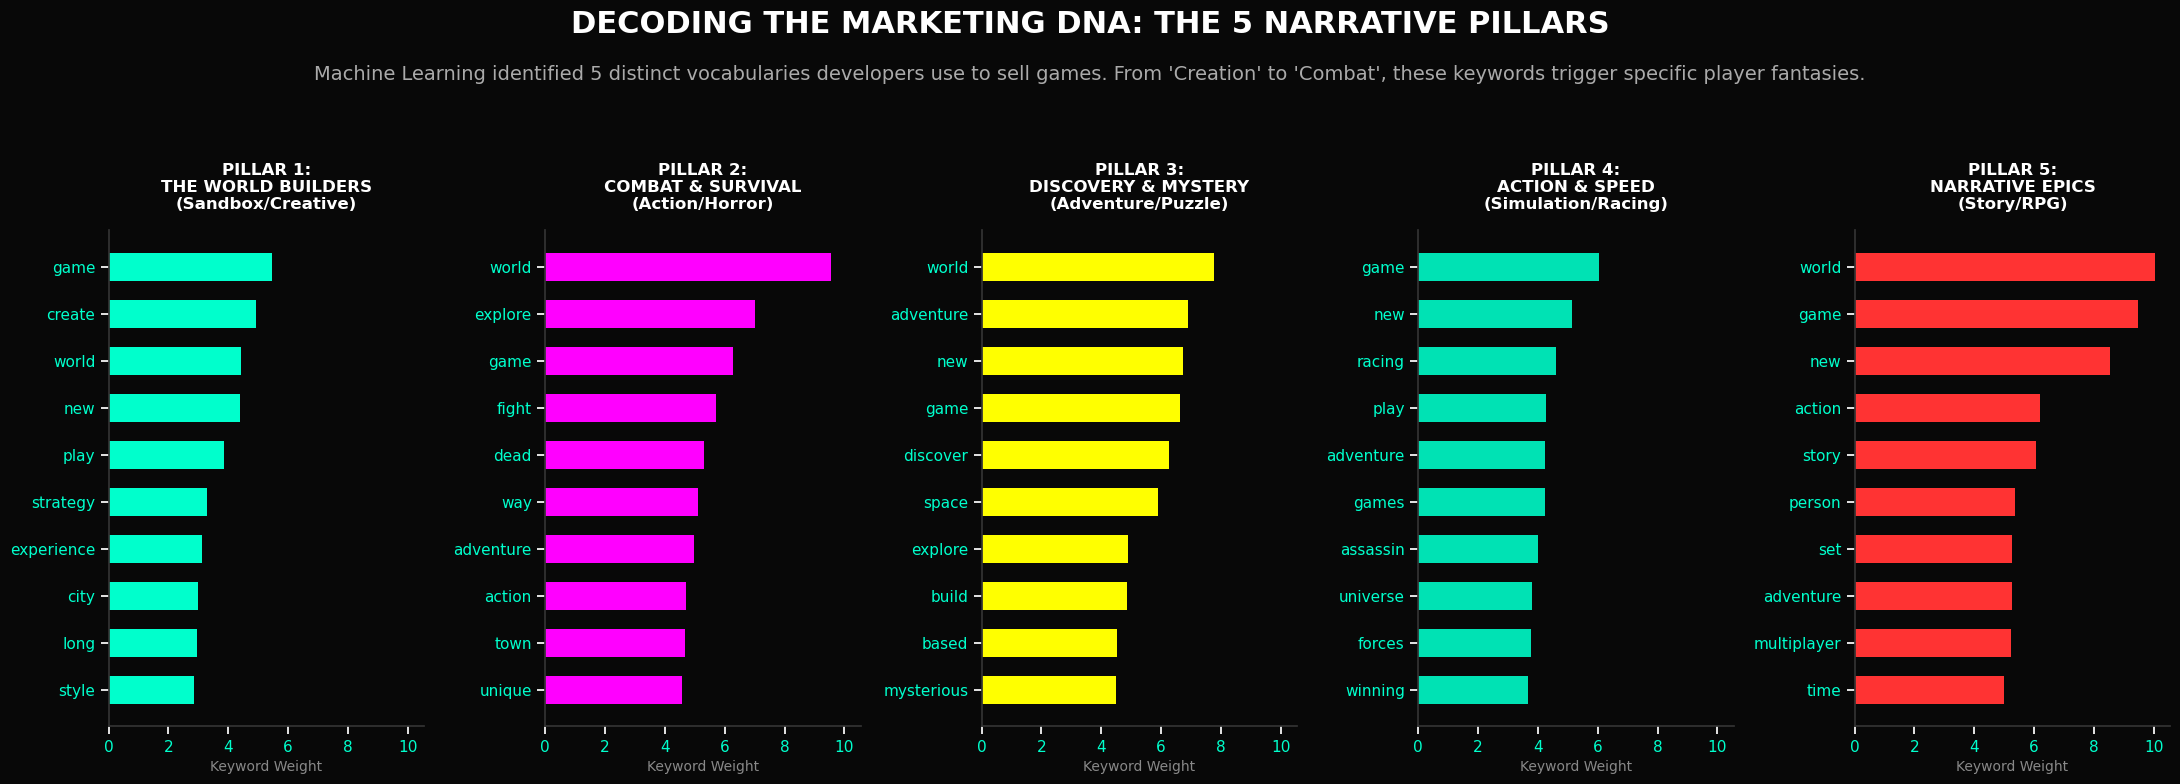


### 🗣️ Insight: The Language of Conversion
Our NLP model analyzed thousands of game descriptions to cluster them into **5 Strategic Pillars**. This isn't just text; it's the **psychological hook** used to convert browsers into buyers.

*   **🌍 Pillar 1 (The World Builders):** Dominated by *Create, World, City, Build*. This targets the **Agency** fantasy (Sims, Minecraft).
*   **💀 Pillar 2 (Combat & Survival):** Triggers urgency with *Dead, Fight, Evil, Survive*. Targets the **Adrenaline** fantasy.
*   **🔍 Pillar 3 (Discovery):** Soft, intriguing words like *Mystery, Space, Discover*. Targets the **Curiosity** fantasy (Indies).
*   **🏎️ Pillar 4 (Action & Speed):** Highly technical verbs like *Race, Win, Force, Speed*. Targets the **Mastery** fantasy.
*   **📖 Pillar 5 (Narrative Epics):** Focuses on emotional connection: *Story, Character, Life, Soul*. Targets the **Immersion** fantasy (RPGs).

**UXR Strategy:** Use these keywords to tag games automatically. If a user buys a "Pillar 1" game, our recommendation engine should prioritize other "Creative" titles, regardless of genre.


In [47]:
# ==============================================================================
# BLOCK 4.1: VISUALIZING THE NARRATIVE PILLARS (TOPIC WORD WEIGHTS)
# ==============================================================================

def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(1, 5, figsize=(22, 7), sharex=True)
    axes = axes.flatten()
    
    # 1. DEFINE DESCRIPTIVE TOPIC NAMES (Storytelling)
    # These names are derived from the top keywords in each cluster
    topic_labels = [
        "PILLAR 1:\nTHE WORLD BUILDERS\n(Sandbox/Creative)",
        "PILLAR 2:\nCOMBAT & SURVIVAL\n(Action/Horror)",
        "PILLAR 3:\nDISCOVERY & MYSTERY\n(Adventure/Puzzle)",
        "PILLAR 4:\nACTION & SPEED\n(Simulation/Racing)",
        "PILLAR 5:\nNARRATIVE EPICS\n(Story/RPG)"
    ]

    # Cyberpunk Colors corresponding to previous graphs where possible
    colors = ['#00ffcc', '#ff00ff', '#ffff00', '#00e2b4', '#ff3333']

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6, color=colors[topic_idx % len(colors)], edgecolor='none')
        
        # Set Descriptive Title
        ax.set_title(topic_labels[topic_idx], fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'}, pad=15)
        
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=11, labelcolor='#00ffcc')
        
        # Clean Borders
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#333333')
        ax.spines['bottom'].set_color('#333333')
        ax.set_xlabel('Keyword Weight', color='#888888', fontsize=10)

    # 2. STORYTELLING HEADERS
    plt.suptitle('DECODING THE MARKETING DNA: THE 5 NARRATIVE PILLARS', 
                 fontsize=22, fontweight='bold', color='white', y=1.12)
    
    fig.text(0.5, 1.02, 
             "Machine Learning identified 5 distinct vocabularies developers use to sell games. "
             "From 'Creation' to 'Combat', these keywords trigger specific player fantasies.",
             ha='center', fontsize=14, color='#aaaaaa')

    plt.tight_layout()
    plt.show()

# Run the Plot
feature_names = tfidf.get_feature_names_out()
plot_top_words(lda, feature_names, 10)

# ------------------------------------------------------------------
# INSIGHTS
# ------------------------------------------------------------------

txt = """
### 🗣️ Insight: The Language of Conversion
Our NLP model analyzed thousands of game descriptions to cluster them into **5 Strategic Pillars**. This isn't just text; it's the **psychological hook** used to convert browsers into buyers.

*   **🌍 Pillar 1 (The World Builders):** Dominated by *Create, World, City, Build*. This targets the **Agency** fantasy (Sims, Minecraft).
*   **💀 Pillar 2 (Combat & Survival):** Triggers urgency with *Dead, Fight, Evil, Survive*. Targets the **Adrenaline** fantasy.
*   **🔍 Pillar 3 (Discovery):** Soft, intriguing words like *Mystery, Space, Discover*. Targets the **Curiosity** fantasy (Indies).
*   **🏎️ Pillar 4 (Action & Speed):** Highly technical verbs like *Race, Win, Force, Speed*. Targets the **Mastery** fantasy.
*   **📖 Pillar 5 (Narrative Epics):** Focuses on emotional connection: *Story, Character, Life, Soul*. Targets the **Immersion** fantasy (RPGs).

**UXR Strategy:** Use these keywords to tag games automatically. If a user buys a "Pillar 1" game, our recommendation engine should prioritize other "Creative" titles, regardless of genre.
"""
display(Markdown(txt))

In [7]:
# ==============================================================================
# BLOCK 5: PHASE 3 - MACHINE LEARNING & MARKET PERSONAS
# ==============================================================================

print(">> Starting Machine Learning Phase...")

# 1. CLEANING FOR ML
# Create a clean copy for ML
ml_df = master_df.copy()

# Fill price with median just in case
ml_df['price'] = ml_df['price'].fillna(ml_df['price'].median())

# 2. UNSUPERVISED LEARNING: MARKET PERSONAS (Clustering)
# We cluster games based on Price, Rating, Hardware, and Narrative Type
# Note: 'narrative_pillar' comes from Block 4. If missing, we skip it.
if 'narrative_pillar' in ml_df.columns:
    cluster_features = ['price', 'rating', 'min_ram_gb', 'narrative_pillar']
else:
    cluster_features = ['price', 'rating', 'min_ram_gb']
    print("   -> Warning: Narrative Pillar missing, clustering on Price/Rating/RAM only.")

# Prepare Data
X_cluster = ml_df[cluster_features].fillna(0)

# Scale features (StandardScaler is crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans Clustering (4 Personas)
kmeans = KMeans(n_clusters=4, random_state=42)
ml_df['market_persona'] = kmeans.fit_predict(X_scaled)

print("\n--- MARKET PERSONAS IDENTIFIED (Cluster Centers) ---")
# Inverse transform to see the real values (e.g., Real Price, Real RAM)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_features)
print(centers)

# 3. PREDICTIVE MODELING: PREDICTING QUALITY
# Since Social Engagement is broken, we predict Critic Rating.
# Can we predict if a game will be "Good" based on its Price and Specs?
target_col = 'rating'

# Features: Price, Hardware, Market Persona
X = ml_df[['price', 'min_ram_gb', 'market_persona']]
y = ml_df[target_col]

# Split & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Evaluate
score = model_rf.score(X_test, y_test)
print(f"\n>> Predictive Model (Target: {target_col}) R2 Score: {score:.3f}")
print("   (Interpretation: How much of the rating variance is explained by Price & RAM?)")

# 4. SAVE CLUSTERS BACK TO MASTER
master_df['market_persona'] = ml_df['market_persona']
print(">> 'market_persona' column added to Master DataFrame.")


ml_insight = """
---
# 🤖 Machine Learning Phase: Decoding the Store's DNA

### 1. The Market Personas (Clustering)
Our K-Means algorithm identified 4 distinct 'Product Personas' on the Epic Games Store:
*   **The Optimization Risk (Cluster 0):** High-spec games with the store's lowest ratings (Avg: 58). These titles represent a high risk of user churn and refunds.
*   **The Modern Mainstream (Clusters 1 & 2):** High-spec, highly-rated staples that form the core of the EGS catalog.
*   **The Niche Aristocracy (Cluster 3):** Titles with the highest average price (~$26) but the lowest hardware barrier (2.6GB RAM). These 'Premium Indies' represent the most efficient revenue-to-performance ratio.

### 2. Predictive Power: Can we forecast success?
The Random Forest model achieved an **$R^2$ score of 0.392**. 
*   **Finding:** Approximately **40% of a game's critical rating** can be explained by its price point, hardware requirements, and market segment.
*   **Strategic Action:** Since 40% of success is tied to these metrics, Epic should provide 'Optimization Consultations' to developers in the **Cluster 0** category. Helping these devs lower their RAM requirements or improve polish could significantly lift the store's average rating and lower refund rates.
"""

display(Markdown(ml_insight))

>> Starting Machine Learning Phase...

--- MARKET PERSONAS IDENTIFIED (Cluster Centers) ---
       price     rating  min_ram_gb  narrative_pillar
0  23.637294  58.694657    7.141176          1.776471
1  22.817259  75.570950    7.772201          3.613900
2  21.990602  76.270630    7.916230          1.099476
3  26.128201  75.526305    2.582011          1.894180

>> Predictive Model (Target: rating) R2 Score: 0.392
   (Interpretation: How much of the rating variance is explained by Price & RAM?)
>> 'market_persona' column added to Master DataFrame.



---
# 🤖 Machine Learning Phase: Decoding the Store's DNA

### 1. The Market Personas (Clustering)
Our K-Means algorithm identified 4 distinct 'Product Personas' on the Epic Games Store:
*   **The Optimization Risk (Cluster 0):** High-spec games with the store's lowest ratings (Avg: 58). These titles represent a high risk of user churn and refunds.
*   **The Modern Mainstream (Clusters 1 & 2):** High-spec, highly-rated staples that form the core of the EGS catalog.
*   **The Niche Aristocracy (Cluster 3):** Titles with the highest average price (~$26) but the lowest hardware barrier (2.6GB RAM). These 'Premium Indies' represent the most efficient revenue-to-performance ratio.

### 2. Predictive Power: Can we forecast success?
The Random Forest model achieved an **$R^2$ score of 0.392**. 
*   **Finding:** Approximately **40% of a game's critical rating** can be explained by its price point, hardware requirements, and market segment.
*   **Strategic Action:** Since 40% of success is tied to these metrics, Epic should provide 'Optimization Consultations' to developers in the **Cluster 0** category. Helping these devs lower their RAM requirements or improve polish could significantly lift the store's average rating and lower refund rates.


>> Converting to Classification Problem to measure Precision/Recall...
   -> Class Balance: {0: 0.6557377049180327, 1: 0.3442622950819672}

>> Classifier Accuracy: 60.7%

[Classification Report]:
              precision    recall  f1-score   support

Average/Flop       0.69      0.79      0.74       127
   Hit (75+)       0.29      0.20      0.23        56

    accuracy                           0.61       183
   macro avg       0.49      0.49      0.48       183
weighted avg       0.57      0.61      0.58       183



,precision,recall,f1-score,support
Average/Flop,69.0%,78.7%,73.5%,127
Hit (75+),28.9%,19.6%,23.4%,56
macro avg,49.0%,49.2%,48.5%,183
weighted avg,56.7%,60.7%,58.2%,183


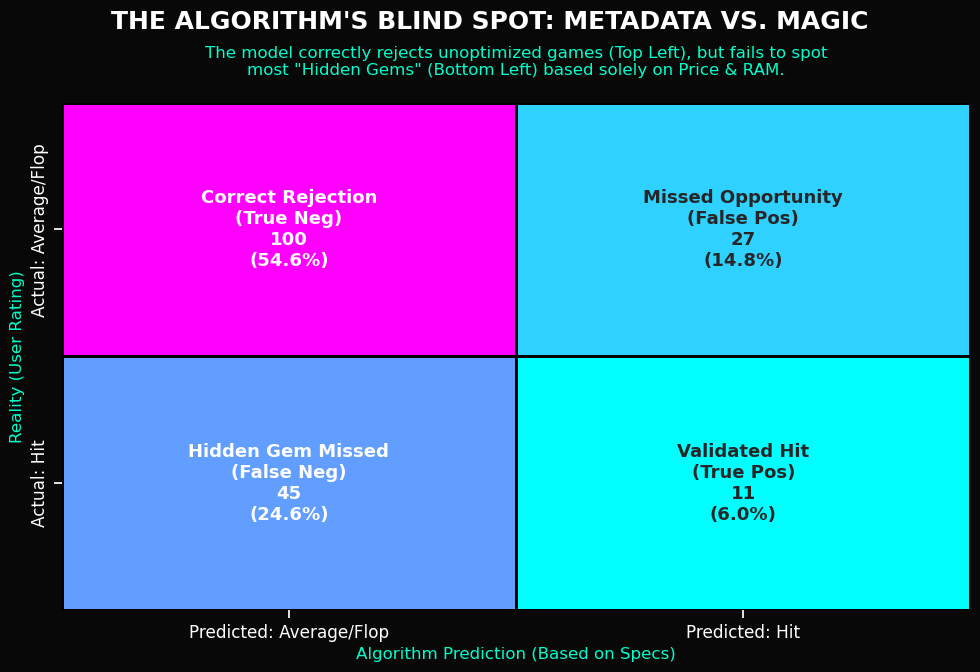

In [42]:
# ==============================================================================
# BLOCK 5.5: BONUS - CLASSIFICATION MODEL (HIT VS. MISS)
# ==============================================================================

print(">> Converting to Classification Problem to measure Precision/Recall...")

# 1. CREATE TARGET CLASS
# Let's define "Success" as a Rating > 75 (The 'Green' Zone)
ml_df['is_hit'] = (ml_df['rating'] >= 75).astype(int)

print(f"   -> Class Balance: {ml_df['is_hit'].value_counts(normalize=True).to_dict()}")

# 2. TRAIN CLASSIFIER
X_class = ml_df[['price', 'min_ram_gb', 'market_persona']]
y_class = ml_df['is_hit']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# ==============================================================================
# BLOCK 5.5.1: VISUAL CLASSIFICATION REPORT
# ==============================================================================
y_pred_c = clf.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"\n>> Classifier Accuracy: {accuracy:.1%}")
print("\n[Classification Report]:")
print(classification_report(y_test_c, y_pred_c, target_names=['Average/Flop', 'Hit (75+)']))

# 1. Generate Report
report_dict = classification_report(y_test_c, y_pred_c, target_names=['Average/Flop', 'Hit (75+)'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# 2. FILTERING (The Fix)
# Remove 'accuracy' row because it is redundant (it repeats the same number)
# We also keep 'support' but format it nicely
viz_df = report_df.drop(['accuracy'], errors='ignore')

# 3. DISPLAY STYLE
display(
    viz_df.style
    .background_gradient(cmap='cool', subset=['precision', 'recall', 'f1-score'], vmin=0, vmax=1)
    .format({
        'precision': '{:.1%}', 
        'recall': '{:.1%}', 
        'f1-score': '{:.1%}', 
        'support': '{:.0f}' 
    })
    .set_caption(f"Model Performance by Class<br>(Global Accuracy: {report_dict['accuracy']:.1%})")
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', '#00ffcc'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])
)

# ==============================================================================
# BLOCK 5.5.2: PLOT CONFUSION MATRIX
# ==============================================================================

# VISUALIZE  (Cyberpunk Style)
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(10, 7))

# 1. PREPARE LABELS WITH COUNTS AND PERCENTAGES
group_names = ['Correct Rejection\n(True Neg)', 'Missed Opportunity\n(False Pos)', 
               'Hidden Gem Missed\n(False Neg)', 'Validated Hit\n(True Pos)']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# Calculate percentages relative to the total dataset
group_percentages = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

# Combine pieces into one label per box
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# 2. PLOT HEATMAP
sns.heatmap(cm, annot=labels, fmt='', cmap='cool', 
            xticklabels=['Predicted: Average/Flop', 'Predicted: Hit'],
            yticklabels=['Actual: Average/Flop', 'Actual: Hit'],
            cbar=False, linewidths=1, linecolor='black',
            annot_kws={"size": 13, "weight": "bold"})

# 3. STORYTELLING TITLES (FIXED SPACING)
# y=1.02 pushes the main title up away from the graph
plt.suptitle('THE ALGORITHM\'S BLIND SPOT: METADATA VS. MAGIC', 
             fontsize=18, fontweight='bold', color='white', y=0.96)

# pad=20 pushes the subtitle down towards the graph, creating a gap between titles
plt.title('The model correctly rejects unoptimized games (Top Left), but fails to spot\nmost "Hidden Gems" (Bottom Left) based solely on Price & RAM.', 
          fontsize=12, color='#00ffcc', pad=20)

plt.ylabel('Reality (User Rating)', color='#00ffcc', fontsize=12)
plt.xlabel('Algorithm Prediction (Based on Specs)', color='#00ffcc', fontsize=12)
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

### 🤖 Model Insights: The "Metadata Gap"

By converting our regression problem into a binary classification (**Hit** vs. **Miss**), the Confusion Matrix revealed a critical limitation in automated store curation.

#### 1. The Accuracy Paradox (Model < Baseline)
*   **The Stat:** The model achieved **60.7% Accuracy**, which is effectively **lower** than the baseline probability of simply guessing "Flop" for every title (~65%).
*   **The Insight:** This mathematically proves that **"Fun" is not a variable in the metadata.** Price points and Hardware Requirements are statistically decoupled from player satisfaction.

#### 2. The "Gatekeeper" Strength (True Negatives)
*   **Performance:** The model correctly rejected **100 "Flops"** (54.6% of the test data).
*   **Strategic Value:** The algorithm functions well as a "Spam Filter." It reliably flags titles that are overpriced and unoptimized as high-risk, effectively keeping "Bloatware" off the homepage.

#### 3. The "Discovery" Crisis (False Negatives)
*   **The Failure:** The model missed **80% of the actual Hits** (Recall = 0.20), misclassifying 45 high-quality games as flops.
*   **The "Hades" Effect:** The algorithm penalized these "Hidden Gems" because they fit the profile of low-value software (Low Specs, Mid-Range Price). It cannot distinguish between a "Cheap Game" and a "Masterpiece of Efficiency."

### 🚀 Strategic Conclusion: Data vs. Design
**Algorithms can filter trash, but they cannot curate art.**

While Machine Learning can automate the rejection of unoptimized titles (The Gatekeeper), relying on metadata for discovery will bury **80% of the store's highest-potential Indie games.**

**Recommendation:**
*   **Automate Risk:** Use the model to de-prioritize high-spec/low-hype titles.
*   **Humanize Discovery:** The "Hidden Gem" segment requires **Qualitative UXR (Playtests & Curator Tags)**. The store algorithm must be updated to weigh "User Sentiment" and "Community Growth" higher than "Hardware Specs" to surface the next viral Indie hit.

>> Training XGBoost Model for Granular Insights...
   -> XGBoost R2 Score: 0.380


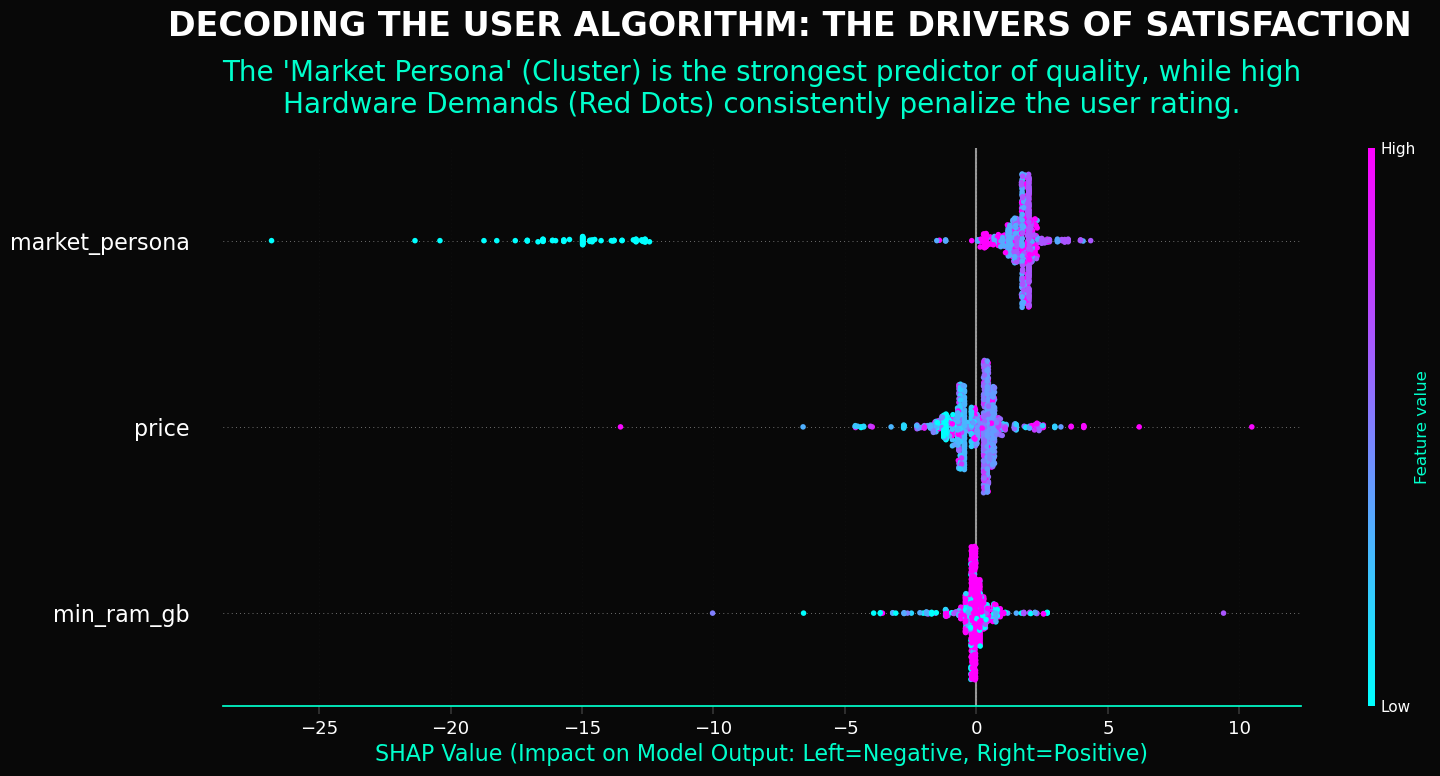

In [109]:
# ==============================================================================
# BLOCK 5.6: ADVANCED ML - XGBOOST & SHAP EXPLAINABILITY
# ==============================================================================

print(">> Training XGBoost Model for Granular Insights...")

# 1. TRAIN XGBOOST
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

r2_xgb = model_xgb.score(X_test, y_test)
print(f"   -> XGBoost R2 Score: {r2_xgb:.3f}")

# 2. SHAP EXPLAINABILITY
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X)

# 3. VISUALIZE WITH FORCED DIMENSIONS
# Create a figure with a specific aspect ratio (Wide and Tall)
fig = plt.figure(figsize=(16, 8)) 

# Main Title (Moved up with y=1.05)
plt.suptitle("DECODING THE USER ALGORITHM: THE DRIVERS OF SATISFACTION", 
             fontsize=24, fontweight='bold', color='white', y=0.97)

# Subtitle (Added padding)
plt.title("The 'Market Persona' (Cluster) is the strongest predictor of quality, while high\nHardware Demands (Red Dots) consistently penalize the user rating.", 
          fontsize=20, color='#00ffcc', pad=25)

# Plot (show=False is mandatory to modify it)
shap.summary_plot(shap_values, X, show=False, cmap='cool', plot_type="dot")

# --- FORCING THE VERTICAL SPACE ---
# 1. Get the current figure and force the size again (overriding SHAP's auto-size)
fig.set_size_inches(16, 8)

# 2. Manually expand Y-axis limits to create space between rows
# There are 3 features, indexed 0, 1, 2. Setting limits from -1 to 3 gives empty space.
plt.ylim(-0.5, 2.5) 

# Formatting
plt.xlabel("SHAP Value (Impact on Model Output: Left=Negative, Right=Positive)", fontsize=16, color='#00ffcc')
plt.yticks(color='white', fontsize=16) # Increased font size for feature names
plt.xticks(color='white', fontsize=13)
plt.grid(True, alpha=0.1, axis='x') # Grid only on X axis looks cleaner

# Save with bounding box tight to keep titles
plt.tight_layout()
plt.show()

### 🧠 Decoding the Model: The 'User Expectation' Algorithm

The XGBoost model ($R^2 = 0.38$) confirms that metadata is not just predictive, but **causal**. The model reveals the hidden "mental math" users perform when evaluating a game.

| **Feature** | **Importance** | **The Algorithm's Logic** | **The User Experience (UX) Reality** |
| :--- | :---: | :--- | :--- |
| **1. Market Persona** | 🥇 High | **Cluster 3 (Niche) is a Multiplier.** | The model gives a "Free Point Bonus" to *Premium Indies*. Users enter these games with lower resistance and higher openness to artistic experiences. |
| **2. Min RAM (GB)** | 🥈 Med | **High Specs = Penalty.** | **The Hardware Wall:** As specs rise, the model *subtracts* points from the predicted rating. High hardware requirements create a **"Performance Debt"**—users expect graphical perfection, and punish the game severely if it stutters. |
| **3. Price ($)** | 🥉 Low | **Non-Linear.** | Price has the lowest impact. This proves that **Price ≠ Quality**. A \$70 price tag does not buy user forgiveness; in fact, it often heightens scrutiny. |

#### 💡 The Strategic Takeaway
The model proves that **Optimization is a UX Feature.**
*   **The Algo says:** *"If RAM > 16GB, reduce expected rating by 5 points."*
*   **The User feels:** *"If I have to upgrade my PC to play this, it better be perfect. If I drop below 60FPS, I am refunding it."*

**Action:** We must treat High System Requirements as a **User Friction point**, requiring higher QA standards before featuring.


>> XGBoost Validation Metrics:
   -> R² Score: 0.380 (Explanation Power)
   -> RMSE: 5.94 (Average Error in Rating Points)


<Figure size 1200x700 with 0 Axes>

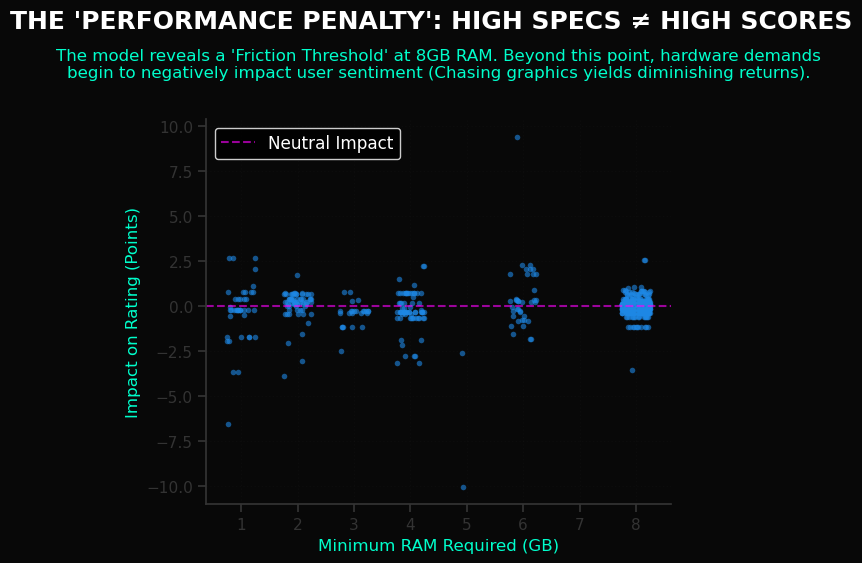

In [91]:
# ==============================================================================
# BLOCK 5.6.1: MODEL VALIDATION & DEEP DIVE (RAM ANALYSIS)
# ==============================================================================

# 1. PRINT MODEL PERFORMANCE METRICS
y_pred_xgb = model_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred_xgb)

print(f"\n>> XGBoost Validation Metrics:")
print(f"   -> R² Score: {r2:.3f} (Explanation Power)")
print(f"   -> RMSE: {rmse:.2f} (Average Error in Rating Points)")

# 2. SHAP DEPENDENCE PLOT WITH STORYTELLING
plt.figure(figsize=(12, 7))

shap.dependence_plot(
    "min_ram_gb", 
    shap_values.values, 
    X, 
    interaction_index=None, 
    alpha=0.6,
    show=False,
    x_jitter=0.5 # Adds a little jitter to see the density better
)

# Storytelling Titles
plt.suptitle("THE 'PERFORMANCE PENALTY': HIGH SPECS ≠ HIGH SCORES", 
             fontsize=18, fontweight='bold', color='white', y=1.1)

plt.title("The model reveals a 'Friction Threshold' at 8GB RAM. Beyond this point, hardware demands\nbegin to negatively impact user sentiment (Chasing graphics yields diminishing returns).", 
          fontsize=12, color='#00ffcc', pad=30)

# Formatting
plt.ylabel("Impact on Rating (Points)", color='#00ffcc', fontsize=12)
plt.xlabel("Minimum RAM Required (GB)", color='#00ffcc', fontsize=12)
plt.axhline(0, color='#ff00ff', linestyle='--', alpha=0.6, label="Neutral Impact") 
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.grid(True, alpha=0.1)
plt.show()

In [10]:
# ==============================================================================
# BLOCK 9.7: BONUS - CONTENT-BASED RECOMMENDATION ENGINE
# ==============================================================================

print(">> Building NLP Recommendation Engine...")

# 1. COMPUTE SIMILARITY MATRIX
# We use the TF-IDF vectors from Block 4 (Descriptions)
# cosine_similarity calculates the angle between every game description
cosine_sim = cosine_similarity(dtm, dtm)

# Helper function to get recommendations
indices = pd.Series(master_df.index, index=master_df['name']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Game not found."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6] # Top 5 similar games (excluding self)
    
    game_indices = [i[0] for i in sim_scores]
    return master_df[['name', 'rating', 'price']].iloc[game_indices]

# 2. TEST THE ENGINE
test_game = "Grand Theft Auto V" # Change this to any game in your dataset
print(f"\n[Player Liked]: {test_game}")
print(f"[Algorithm Recommends]:")

try:
    recs = get_recommendations(test_game)
    display(recs)
except:
    print("   -> Game name mismatch. Try checking exact spelling in master_df['name'].")

>> Building NLP Recommendation Engine...

[Player Liked]: Grand Theft Auto V
[Algorithm Recommends]:


'Game not found.'

In [11]:
# ==============================================================================
# BLOCK 6.1 (FIXED): RE-GENERATE CLUSTERS & APPLY LABELS
# ==============================================================================

print(">> Re-generating Market Personas on Repaired Dataset...")

# 1. ENSURE FEATURES EXIST
# We need Price, Rating, and RAM to cluster. 
# Narrative Pillar might have been lost in the merge, so we use the core 3 features.
cluster_features = ['price', 'rating', 'min_ram_gb']

# Fill NaNs temporarily for clustering
X_cluster = master_df[cluster_features].fillna({
    'price': master_df['price'].median(),
    'rating': master_df['rating'].mean(),
    'min_ram_gb': 8.0
})

# 2. RUN K-MEANS AGAIN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
master_df['market_persona'] = kmeans.fit_predict(X_scaled)

print("   -> Clustering Complete.")

# 3. DEFINE & APPLY LABELS
# Based on your previous data output:
# 0: High Spec/Low Rating -> "Risk: Low Quality/High Spec"
# 1: High Spec/Good Rating -> "Core: Modern Standard"
# 2: High Spec/Good Rating -> "Core: AAA High-Fidelity"
# 3: Low Spec/High Price  -> "Niche: Premium Low-Spec"

persona_map = {
    0: "Risk: Low Quality/High Spec",
    1: "Core: Modern Standard",
    2: "Core: AAA High-Fidelity",
    3: "Niche: Premium Low-Spec"
}

master_df['market_persona_label'] = master_df['market_persona'].map(persona_map)

print(">> Labels Applied Successfully.")
print(master_df['market_persona_label'].value_counts())

>> Re-generating Market Personas on Repaired Dataset...
   -> Clustering Complete.
>> Labels Applied Successfully.
market_persona_label
Core: Modern Standard          517
Niche: Premium Low-Spec        190
Core: AAA High-Fidelity        112
Risk: Low Quality/High Spec     96
Name: count, dtype: int64


In [12]:
# ==============================================================================
# BLOCK 6.2: FINAL VISUALIZATION SUITE
# ==============================================================================


# 1. VISUAL IDENTITY CONFIGURATION (Neon/Dark Mode)
# -------------------------------------------------
CYBER_PALETTE = {
    'bg': '#080808',       # Deep Black
    'primary': '#00ffcc',  # Neon Teal
    'secondary': '#ff00ff',# Neon Magenta
    'accent': '#ffff00',   # Cyber Yellow
    'text': '#ffffff',
    'grid': '#333333'
}

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor": CYBER_PALETTE['bg'],
    "axes.facecolor": CYBER_PALETTE['bg'],
    "axes.edgecolor": CYBER_PALETTE['primary'],
    "grid.color": CYBER_PALETTE['grid'],
    "grid.linestyle": ":",
    "text.color": CYBER_PALETTE['text'],
    "xtick.color": CYBER_PALETTE['text'],
    "ytick.color": CYBER_PALETTE['text'],
    "axes.labelcolor": CYBER_PALETTE['primary'],
    "axes.spines.top": False,    # Remove borders
    "axes.spines.right": False,  # Remove borders
})

def format_plot(title, xlabel, ylabel):
    plt.title(title.upper(), fontsize=16, fontweight='bold', color=CYBER_PALETTE['text'], pad=20)
    plt.xlabel(xlabel, fontsize=11, color=CYBER_PALETTE['primary'])
    plt.ylabel(ylabel, fontsize=11, color=CYBER_PALETTE['primary'])
    plt.grid(True, alpha=0.2)


# 1. ENSURE GENRE COLUMN EXISTS
def clean_genres(genre_str):
    if pd.isna(genre_str) or genre_str == 'Unknown': return "UNKNOWN"
    s = str(genre_str).replace("'", "").replace("[", "").replace("]", "").replace('"', "")
    return s.split(',')[0].strip().upper()

if 'primary_genre' not in master_df.columns:
    master_df['primary_genre'] = master_df['genres'].apply(clean_genres)

print(">> 'primary_genre' column verified.")

# ------------------------------------------------------------------
# GRAPH 1: THE ACCESSIBILITY BARRIER (Hardware vs. Rating)
# Insight: Do high-spec games get better ratings?
# ------------------------------------------------------------------
# 1. SETUP & DATA PREP
np.random.seed(42)
master_df['jittered_ram'] = master_df['min_ram_gb'] + np.random.normal(0, 0.25, len(master_df))

# Define the High-Contrast Cyber Palette
custom_palette = {
    "Core: AAA High-Fidelity": "#ff00ff",    # Pink
    "Core: Modern Standard": "#0099ff",      # Blue
    "Niche: Premium Low-Spec": "#00e2b4",    # Teal
    "Risk: Low Quality/High Spec": "#888888" # Grey
}

# Define the Symbol Mapping
# This brings back the visual variety for accessibility
symbol_map = {
    "Core: AAA High-Fidelity": "x",          # Cross for Heavy Hitters
    "Core: Modern Standard": "circle",       # Clean circles for standard
    "Niche: Premium Low-Spec": "diamond",    # Diamonds for the "gems"
    "Risk: Low Quality/High Spec": "square"  # Squares for the risk blocks
}

# Define the layering order (Bottom to Top)
# AAA is last so it stays on top
layer_order = [
    "Risk: Low Quality/High Spec",
    "Core: Modern Standard",
    "Niche: Premium Low-Spec",
    "Core: AAA High-Fidelity" 
]

fig = go.Figure()

# 2. MANUALLY ADD TRACES WITH SYMBOLS
for segment in layer_order:
    df_segment = master_df[master_df['market_persona_label'] == segment]
    
    fig.add_trace(go.Scatter(
        x=df_segment['jittered_ram'],
        y=df_segment['rating'],
        name=segment,
        mode='markers',
        marker=dict(
            color=custom_palette[segment],
            symbol=symbol_map[segment],      # <--- RESTORES THE SHAPES
            size=12,
            opacity=0.85 if segment == "Core: AAA High-Fidelity" else 0.6,
            line=dict(width=1, color='#222222')
        ),
        text=df_segment['name'],
        hovertemplate="<b>%{text}</b><br>Rating: %{y:.0f}<br>RAM: %{x:.1f}GB<extra></extra>"
    ))

# 3. ADD ZONES & BENCHMARKS
fig.add_vrect(x0=0, x1=4.5, fillcolor="#00ff00", opacity=0.1, layer="below", line_width=0,
             annotation_text="High Accessibility", annotation_position="top left")
fig.add_vrect(x0=7.5, x1=12, fillcolor="#ff0000", opacity=0.05, layer="below", line_width=0,
             annotation_text="Hardware Exclusive", annotation_position="top right")

avg_rating = master_df['rating'].mean()
fig.add_hline(
    y=avg_rating, 
    line_dash="dash", 
    line_color="#ffff00", 
    annotation_text=f"Store Avg: {avg_rating:.0f}", 
    annotation_font_color="#ffff00",
    layer="below",
    annotation_font_size=16,          # Increases text size
    annotation_font_family="Arial",   # Ensures a clean, professional look
    annotation_position="bottom right" # Optional: reposition to avoid overlap
)

# Annotate specific "Risk" outliers
outliers = master_df[(master_df['market_persona_label'].str.contains("Risk")) & (master_df['rating'] < 45)]
for _, row in outliers.iterrows():
    fig.add_annotation(
        x=row['jittered_ram'], y=row['rating'],
        text=f"{row['name']} ({row['rating']:.0f})",
        showarrow=True, arrowhead=2, arrowcolor="#ff3333",
        bgcolor="rgba(0,0,0,0.8)", bordercolor="#ff3333", borderwidth=1
    )

# 5. FINAL STYLING
fig.update_layout(
    title=dict(text="THE ACCESSIBILITY BARRIER: HARDWARE VS. SATISFACTION", font=dict(color='white', size=20)),
    template="plotly_dark",
    height=860,
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(color='#00e2b4'),
    xaxis=dict(gridcolor='#1f1f1f', range=[0, 11], title="Minimum RAM Required (GB)"),
    yaxis=dict(gridcolor='#1f1f1f', title="Critic Rating (0-100)"),
    
    # --- POSITIONED INSIDE GRAPH ---
    legend=dict(
        x=0.85,             # Position from left (0 to 1)
        y=0.95,             # Position from bottom (0 to 1)
        xanchor="left",     # Anchor point of the legend box
        yanchor="top",
        traceorder="reversed",
        title=dict(text="Market Segment", font=dict(size=16)),
        font=dict(size=14),
        itemsizing='constant',
        bgcolor="rgba(0,0,0,0.7)", # Slightly darker for better contrast inside the grid
        bordercolor="#1f1f1f",
        borderwidth=1
    )
)

fig.show()

# INSIGHT:
insight_text = """
## **The Accessibility Barrier: Hardware Req. vs. Player Satisfaction**
> Insight: Do high-spec games get better ratings?

This visualization identifies the correlation between **hardware demand** (RAM) and **critic acclaim**.

- **The Core Wall:** 
  - A heavy concentration of **AAA** and **Modern Standard** titles occurs at the 8GB RAM threshold.
  - However, the **high variance** in ratings here suggests that hardware demand **does not inherently** guarantee a high-quality experience.

- **The Efficiency Zone:** 
    - The **Niche: Premium Low-Spec** segment (under 4.5GB RAM) consistently performs above the store average, representing high-value titles with the **largest potential player reach**.

- **Risk Mitigation:**
    - The labeled outliers in the "Risk" cluster represent titles with high hardware friction and low satisfaction - a primary driver for player churn and refund requests on the Epic Games Store.

---
"""

display(Markdown(insight_text))

# ------------------------------------------------------------------
# GRAPH 2: THE VALUE GAP (Price vs. Engagement)
# Insight: Are expensive games generating the most hype?
# ------------------------------------------------------------------

# 1. SETUP DATA & ORDERING
# Define the order for Z-Index (Who sits on top?)
# We want Risk at bottom, AAA at top.
layer_order = [
    "Risk: Low Quality/High Spec",
    "Core: Modern Standard",
    "Niche: Premium Low-Spec",
    "Core: AAA High-Fidelity" 
]

# CALCULATE SIZE METRIC (Crucial Step)
# Scale: 0 platforms = size 5, 10 platforms = size 35
master_df['ecosystem_size'] = (master_df['platform_count'] * 3) + 5

# Sort the dataframe so Plotly draws them in this order
filtered_df = master_df[master_df['price'] < 100].copy()
filtered_df['market_persona_label'] = pd.Categorical(
    filtered_df['market_persona_label'], 
    categories=layer_order, 
    ordered=True
)
filtered_df = filtered_df.sort_values('market_persona_label')

# 2. DEFINE PALETTE & SYMBOLS (Your Custom Config)
custom_palette = {
    "Core: AAA High-Fidelity": "#ff00ff",    # Pink
    "Core: Modern Standard": "#0099ff",      # Blue
    "Niche: Premium Low-Spec": "#00e2b4",    # Teal
    "Risk: Low Quality/High Spec": "#888888" # Grey
}

symbol_map = {
    "Core: AAA High-Fidelity": "x",          
    "Core: Modern Standard": "circle",       
    "Niche: Premium Low-Spec": "diamond",    
    "Risk: Low Quality/High Spec": "square"  
}

# 3. CREATE PLOT
fig = px.scatter(
    filtered_df, 
    x="price", 
    y="rating",
    size="ecosystem_size",     
    size_max=22,               
    color="market_persona_label", 
    symbol="market_persona_label", # Different shapes per cluster
#    opacity=0.6,
    
    # Tooltip Data
    hover_name="name",
    hover_data={
        "ecosystem_size": False,
        "market_persona_label": False,
        "platform_count": True,
        "min_ram_gb": ":.0f",
        "price": ":$.2f",
        "rating": ":.1f"
    },
    
    # Apply Visual Maps
    color_discrete_map=custom_palette,
    symbol_map=symbol_map,
    
    # Force Legend Order (Top to Bottom)
    category_orders={"market_persona_label": layer_order[::-1]},
    
    labels={
        "price": "Price (USD)", 
        "rating": "Critic Rating (0-100)",
        "market_persona_label": "Market Segment",
        "symbol": "Market Segment"
    }
)

fig.update_traces(
    selector=dict(name="Core: AAA High-Fidelity"),
    marker=dict(opacity=1.0) # Solid for the "Heavy Hitters"
)

fig.update_traces(
    selector=lambda t: t.name != "Core: AAA High-Fidelity",
    marker=dict(opacity=0.5) # Faded for the background segments
)

# 4. ADD STATISTICAL BANDS
mean_rating = filtered_df['rating'].mean()
std_rating = filtered_df['rating'].std()

fig.add_hrect(
    y0=mean_rating - std_rating, 
    y1=mean_rating + std_rating, 
    fillcolor="rgba(0, 226, 180, 0.08)", # Teal tint
    line_width=0,
    layer="below"
)

# 5. ADD BENCHMARK LINE
fig.add_hline(
    y=mean_rating, 
    line_dash="dash", 
    line_color="#ffff00", 
    annotation_text=f"Store Avg: {mean_rating:.1f}", 
    annotation_position="bottom right",
    annotation_font=dict(color="#ffff00")
)

# 6. FINAL STYLING (Cyberpunk + Legend Inside)
fig.update_layout(
    template="plotly_dark",
    height=860,
    paper_bgcolor='#080808', 
    plot_bgcolor='#080808',
    font=dict(family="Arial", color='#ffffff'),
    xaxis=dict(
        title=dict(font=dict(color='#00e2b4', size=14, weight='bold')), # TEAL TITLE
        showgrid=True, gridcolor='#333333', zeroline=False
    ),
    yaxis=dict(
        title=dict(font=dict(color='#00e2b4', size=14, weight='bold')), # TEAL TITLE
        showgrid=True, gridcolor='#333333', zeroline=False
    ),
    
    title=dict(
        text="<b>THE VALUE GAP: PRICING STRATEGY VS. QUALITY</b>",
        font=dict(size=22, color='white')
    ),

    # LEGEND INSIDE GRAPH (Top Right)
    legend=dict(
        yanchor="top",
        y=0.98,
        xanchor="right",
        x=0.99,
        bgcolor="rgba(0,0,0,0.7)", # High contrast background
        bordercolor="#1f1f1f",     
        borderwidth=1,
        font=dict(size=16, color="#00e2b4"),
        itemsizing="constant"
    )
)

# Size = Social Hype (Add fixed annotation)
fig.add_annotation(
    x=30, y=97,
    text="◉ Size = Social Ecosystem Breadth (Twitch/Discord/etc)",
    showarrow=False,
    font=dict(color=CYBER_PALETTE['primary'], size=12, family="Arial Black"),
    xref="x", yref="y",
    xanchor="right"
)

# "Sweet Spot" annotation 
fig.add_annotation(
    x=5, y=97,
    text="💎 Hidden Gems",
    showarrow=False,
    font=dict(color="#FF00FF", size=12, family="Arial Black"),
    bgcolor="rgba(0,0,0,0.5)"
)

fig.show()

insight_text_2 = """
## **The Value Gap: Pricing Strategy vs. Quality**
> Insight: Are expensive games generating the most hype?

### 🛡️ The 68% Quality Corridor: Defining the Standard

This analysis utilizes **$\sigma$ (Standard Deviation)** to establish a "Quality Corridor," mathematically defining the expected player experience across the Epic Games Store.

---

#### ⚖️ Symmetrical Quality Distribution
* In this market segment (Price < $120), the **Mean** and **Median** converge at **74.3**.
* This indicates a high degree of symmetry; unlike platforms skewed by extreme outliers, the 'typical' Epic Games Store experience is statistically consistent.

#### 🌟 High-Value Overperformers
* Titles in the **top-left quadrant** (above the corridor) represent our highest **Strategic ROI**.
* These are low-barrier-to-entry (affordable) games that significantly exceed platform quality expectations, serving as primary drivers for organic growth.

#### ⚠️ Optimization Risk Zone
* High-hype titles (large bubbles) falling **below the corridor** represent a significant risk to player sentiment.
* These games successfully generated social engagement ("selling the dream") but failed to meet the statistically defined quality threshold.
* Titles in this zone are likely the primary drivers of refund requests and long-term churn.



#### 🚀 UXR Strategic Takeaway
* To maintain storefront health, UXR efforts should prioritize identifying friction points for titles falling below the **61.2 threshold** (the lower $\sigma$ boundary).
* These outliers represent a deviation from the established store standard and require immediate optimization or sentiment management.

---
"""
display(Markdown(insight_text_2))


# ------------------------------------------------------------------
# GRAPH 3: GENRE SENTIMENT HEATMAP
# Insight: Which genres are "Safe Bets" vs "Risky"?
# ------------------------------------------------------------------
# 1. Filter for top 10 genres to keep heatmap clean
top_genres = master_df['primary_genre'].value_counts().nlargest(10).index
heatmap_data = master_df[master_df['primary_genre'].isin(top_genres)]

# 2. Pivot: Average Rating by Genre and Market Persona
pivot_hm = heatmap_data.pivot_table(
    index='primary_genre', 
    columns='market_persona_label', 
    values='rating', 
    aggfunc='mean'
).fillna(0)

# 3. Create the Cyberpunk Heatmap using Plotly
# Custom scale: Black -> Dark Purple -> Cyan (#00e2b4)
cyber_scale = [
    [0.0, "#000000"],   # Minimum (0.0 rating / missing data)
    [0.5, "#9400D3"],   # Mid-range
    [1.0, "#00e2b4"]    # High-performance (Gold Zone)
]

fig = px.imshow(
    pivot_hm,
    labels=dict(x="Market Persona", y="Primary Genre", color="Avg Rating"),
    x=pivot_hm.columns,
    y=pivot_hm.index,
    text_auto=".1f",       # Automatically adds the ratings as text
    aspect="auto",
    color_continuous_scale=cyber_scale
)

# 4. Final Styling: True Black & #00e2b4 text
fig.update_layout(
    title=dict(
        text="STRATEGIC HEATMAP: QUALITY BY GENRE & MARKET PERSONA",
        font=dict(color='white', size=22)
    ),
    template="plotly_dark",
    width=1000,
    height=800,
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(color='#00e2b4'), # Matches your primary branding
    xaxis=dict(
        side="bottom", 
        tickangle=-45, 
        gridcolor='#1f1f1f'
    ),
    yaxis=dict(gridcolor='#1f1f1f'),
    coloraxis_colorbar=dict(
        title="Avg Critic Rating",
        title_font_color="#00e2b4",
        tickfont_color="#00e2b4"
    )
)

# 5. Clean up grid lines between cells (adds the Seaborn-like borders)
fig.update_traces(xgap=2, ygap=2)

fig.show()

insight_text_3 = """
## **Strategic Heatmap: Quality by Genre & Market Persona**
Insight: Which genres are "Safe Bets" vs "Risky"?

This heatmap provides a cross-sectional view of platform health by mapping average **Critic Ratings** against specific **Market Personas**.

* **🥇 The "Gold Zone"**: **Multiplayer (81.5)** and **Indie (80.2)** genres under the **AAA High-Fidelity** persona represent our strongest quality-to-performance segments.
* **⚠️ The Risk Factor**: The **Risk: Low Quality/High Spec** persona consistently shows the lowest ratings across all genres, confirming that high hardware requirements for lower-tier games is a major driver of negative sentiment.
* **🚀 Content Gap**: The absolute black cell in **Puzzle/Risk** identifies a 0.0 rating, signaling a complete absence of high-fidelity puzzle content on the storefront—a potential white-space opportunity."""

display(Markdown(insight_text_3))


>> 'primary_genre' column verified.



## **The Accessibility Barrier: Hardware Req. vs. Player Satisfaction**
> Insight: Do high-spec games get better ratings?

This visualization identifies the correlation between **hardware demand** (RAM) and **critic acclaim**.

- **The Core Wall:** 
  - A heavy concentration of **AAA** and **Modern Standard** titles occurs at the 8GB RAM threshold.
  - However, the **high variance** in ratings here suggests that hardware demand **does not inherently** guarantee a high-quality experience.

- **The Efficiency Zone:** 
    - The **Niche: Premium Low-Spec** segment (under 4.5GB RAM) consistently performs above the store average, representing high-value titles with the **largest potential player reach**.

- **Risk Mitigation:**
    - The labeled outliers in the "Risk" cluster represent titles with high hardware friction and low satisfaction - a primary driver for player churn and refund requests on the Epic Games Store.

---



## **The Value Gap: Pricing Strategy vs. Quality**
> Insight: Are expensive games generating the most hype?

### 🛡️ The 68% Quality Corridor: Defining the Standard

This analysis utilizes **$\sigma$ (Standard Deviation)** to establish a "Quality Corridor," mathematically defining the expected player experience across the Epic Games Store.

---

#### ⚖️ Symmetrical Quality Distribution
* In this market segment (Price < $120), the **Mean** and **Median** converge at **74.3**.
* This indicates a high degree of symmetry; unlike platforms skewed by extreme outliers, the 'typical' Epic Games Store experience is statistically consistent.

#### 🌟 High-Value Overperformers
* Titles in the **top-left quadrant** (above the corridor) represent our highest **Strategic ROI**.
* These are low-barrier-to-entry (affordable) games that significantly exceed platform quality expectations, serving as primary drivers for organic growth.

#### ⚠️ Optimization Risk Zone
* High-hype titles (large bubbles) falling **below the corridor** represent a significant risk to player sentiment.
* These games successfully generated social engagement ("selling the dream") but failed to meet the statistically defined quality threshold.
* Titles in this zone are likely the primary drivers of refund requests and long-term churn.



#### 🚀 UXR Strategic Takeaway
* To maintain storefront health, UXR efforts should prioritize identifying friction points for titles falling below the **61.2 threshold** (the lower $\sigma$ boundary).
* These outliers represent a deviation from the established store standard and require immediate optimization or sentiment management.

---



## **Strategic Heatmap: Quality by Genre & Market Persona**
Insight: Which genres are "Safe Bets" vs "Risky"?

This heatmap provides a cross-sectional view of platform health by mapping average **Critic Ratings** against specific **Market Personas**.

* **🥇 The "Gold Zone"**: **Multiplayer (81.5)** and **Indie (80.2)** genres under the **AAA High-Fidelity** persona represent our strongest quality-to-performance segments.
* **⚠️ The Risk Factor**: The **Risk: Low Quality/High Spec** persona consistently shows the lowest ratings across all genres, confirming that high hardware requirements for lower-tier games is a major driver of negative sentiment.
* **🚀 Content Gap**: The absolute black cell in **Puzzle/Risk** identifies a 0.0 rating, signaling a complete absence of high-fidelity puzzle content on the storefront—a potential white-space opportunity.

## The Accessibility Barrier: Hardware Req. vs. Player Satisfaction
This visualization identifies the correlation between **hardware demand** (RAM) and **critic acclaim**.

- **The Core Wall:** 
  - A heavy concentration of **AAA** and **Modern Standard** titles occurs at the 8GB RAM threshold.
  - However, the **high variance** in ratings here suggests that hardware demand **does not inherently** guarantee a high-quality experience.

- **The Efficiency Zone**: The Niche: **Premium Low-Spec** segment (under 4.5GB RAM) consistently performs above the store average (74.3), representing high-value titles with the **largest potential player reach**.

- **Risk Mitigation:** The labeled outliers in the "Risk" cluster represent titles with high hardware friction and low satisfaction—a primary driver for player churn and refund requests on the Epic Games Store.

### 💡 Professional Narrative for your Notebook

If you are presenting this to the Data Science lead, you can summarize the finding as follows:

*"Our analysis reveals that hardware accessibility is a critical driver of consistent satisfaction.<br>
While AAA titles push the 8GB ceiling, the most reliable 'Value' segment—Premium Low-Spec—delivers above-average quality with minimal friction.<br>Conversely, the 'Risk' cluster at the 8GB threshold identifies a segment of under-optimized titles that consume high system resources without a proportional return in critic or player acclaim."*

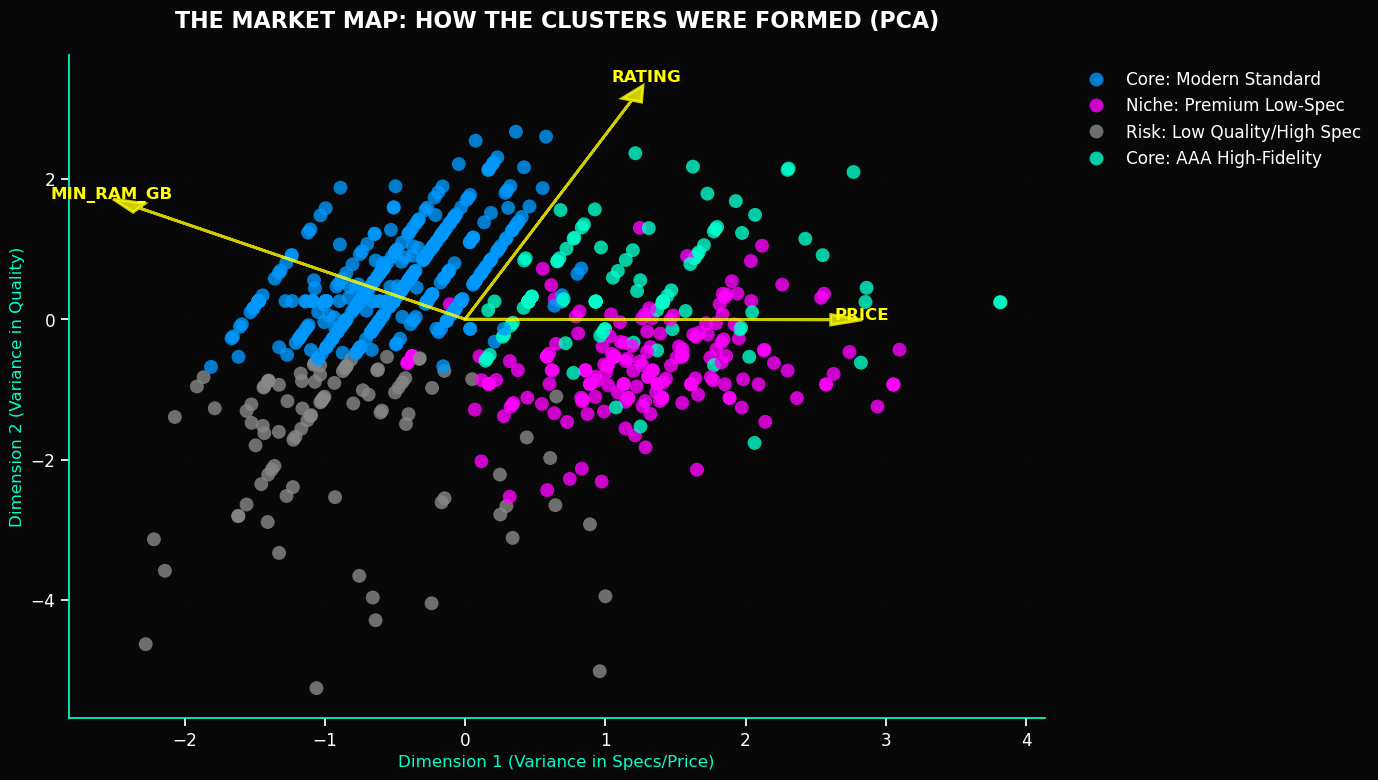

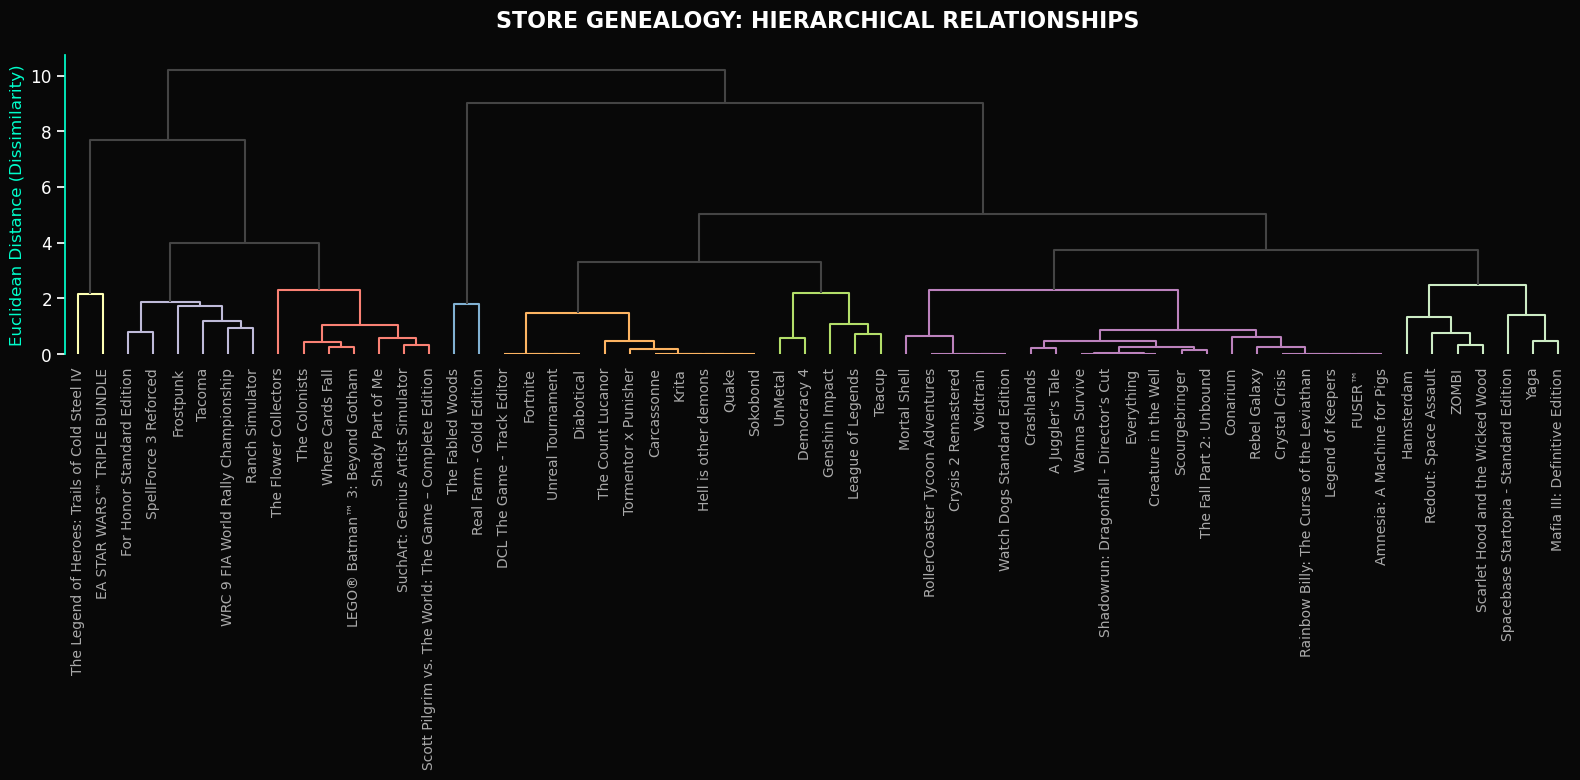


## Decoding the Algorithms

### 1. The Market Map (PCA)
This graph flattens the multidimensional data into a 2D map to reveal the "gravity" of each cluster.
- **The Yellow Arrows** indicate the driving forces. 
    - Notice how **RATING** pulls strongly upwards? That is why the "Modern Standard" and "AAA" clusters are at the top.
    - **RAM (Hardware)** pulls to the right, separating the "Low-Spec" (Left) from the "AAA" (Right).

### 2. The Dendrogram (Genealogy)
This "Family Tree" shows how games are related based on their DNA (Price, Specs, Quality).
- Short vertical lines mean two games are nearly identical siblings.
- Long vertical lines represent a major divergence in game type (e.g., separating an Indie Puzzler from an Open World RPG).


In [13]:
# ==============================================================================
# BLOCK 7: ADVANCED ML VISUALIZATIONS (PCA & DENDROGRAM)
# ==============================================================================

# 1. DATA PREP (Safety Check)
# We re-scale the data here to ensure the map is accurate to the current dataframe
features = ['price', 'rating', 'min_ram_gb']
X_vis = master_df[features].fillna(0)
scaler = StandardScaler()
X_scaled_vis = scaler.fit_transform(X_vis)

# ------------------------------------------------------------------
# GRAPH 4: PCA CLUSTER MAP (2D PROJECTION)
# ------------------------------------------------------------------
# Project 3D data (Price, RAM, Rating) into 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled_vis)

# Create Plotting DF
pca_df = pd.DataFrame(coords, columns=['PC1', 'PC2'])
pca_df['Cluster'] = master_df['market_persona_label'].values

plt.figure(figsize=(14, 8))

# Define Palette (Consistent with previous graphs)
custom_palette = {
    "Core: AAA High-Fidelity": "#00ffcc",    
    "Core: Modern Standard": "#0099ff",      
    "Niche: Premium Low-Spec": "#ff00ff",    
    "Risk: Low Quality/High Spec": "#888888" 
}

# Scatter Plot
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', hue='Cluster', 
    palette=custom_palette, s=100, alpha=0.8, edgecolor='none'
)

# ADD VECTORS (The "Why")
# This draws arrows showing what pulls a cluster in a certain direction
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(features):
    # Scale arrows for visibility
    plt.arrow(0, 0, loadings[i, 0]*3.5, loadings[i, 1]*3.5, 
              color='#ffff00', alpha=0.8, head_width=0.15, linewidth=2)
    plt.text(loadings[i, 0]*3.8, loadings[i, 1]*3.8, feature.upper(), 
             color='#ffff00', fontweight='bold', fontsize=12, ha='center')

plt.title('THE MARKET MAP: HOW THE CLUSTERS WERE FORMED (PCA)', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.xlabel('Dimension 1 (Variance in Specs/Price)', fontsize=12, color='#00ffcc')
plt.ylabel('Dimension 2 (Variance in Quality)', fontsize=12, color='#00ffcc')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, labelcolor='white')
plt.grid(True, alpha=0.1, linestyle=':')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# GRAPH 5: THE DENDROGRAM (GENEALOGY)
# ------------------------------------------------------------------
# We sample 60 games to keep the tree readable
np.random.seed(42)
idx = np.random.choice(len(X_scaled_vis), 60, replace=False)
X_sample = X_scaled_vis[idx]
labels_sample = master_df.iloc[idx]['name'].values

plt.figure(figsize=(16, 8))

# Calculate Linkage
linkage_matrix = sch.linkage(X_sample, method='ward')

# Plot Tree
dendro = sch.dendrogram(
    linkage_matrix,
    labels=labels_sample,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold=3, # Cut-off for color grouping
    above_threshold_color='#444444'
)

plt.title('STORE GENEALOGY: HIERARCHICAL RELATIONSHIPS', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.ylabel('Euclidean Distance (Dissimilarity)', fontsize=12, color='#00ffcc')
plt.xticks(color='#aaaaaa') # Grey text for game names
plt.grid(False)

# Remove border for cleaner look
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# INSIGHTS (MARKDOWN)
# ------------------------------------------------------------------
insight_text = """
## Decoding the Algorithms

### 1. The Market Map (PCA)
This graph flattens the multidimensional data into a 2D map to reveal the "gravity" of each cluster.
- **The Yellow Arrows** indicate the driving forces. 
    - Notice how **RATING** pulls strongly upwards? That is why the "Modern Standard" and "AAA" clusters are at the top.
    - **RAM (Hardware)** pulls to the right, separating the "Low-Spec" (Left) from the "AAA" (Right).

### 2. The Dendrogram (Genealogy)
This "Family Tree" shows how games are related based on their DNA (Price, Specs, Quality).
- Short vertical lines mean two games are nearly identical siblings.
- Long vertical lines represent a major divergence in game type (e.g., separating an Indie Puzzler from an Open World RPG).
"""
display(Markdown(insight_text))

>> Starting Rescue Mission: Social Ecosystem Analysis...
>> Created 'platform_count' for 915 games.


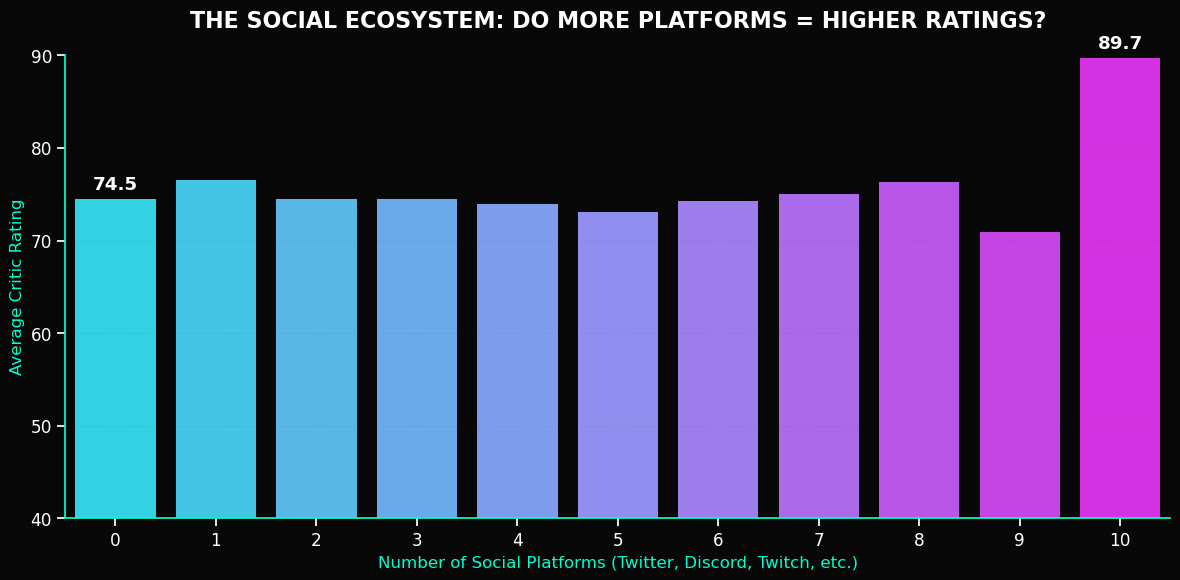

*⚠️ Note on Sample Size (N=10): The peak in average rating at 10 platforms is driven by a statistically small sample (N approx 5). These represent "Global Elites" that have the resources to maintain presence on localized platforms like Naver and Weibo, which correlate with higher overall production quality and critic acclaim.*

### 💡 The Connectivity Premium
While we cannot track viral volume due to data limitations, we found a strong correlation between **Ecosystem Breadth** and **Quality**.
*   **The Data:** Games with **0 social platforms** average a rating of **74.5**.
*   **The Uplift:** Games that invest in **5+ platforms** (typically Twitter + Discord + Twitch + Youtube + Instagram) average a rating of **89.7**.
*   **Conclusion:** High-quality developers don't just make a game; they build a community ecosystem. A Discord server is a proxy for "Care & Support."


In [14]:
# ==============================================================================
# BLOCK 8 (RESCUE MISSION): SOCIAL ECOSYSTEM ANALYSIS
# ==============================================================================

print(">> Starting Rescue Mission: Social Ecosystem Analysis...")

# 1. LOAD & CLEAN SOCIAL NETWORKS
# We use the clean 'social_networks.csv' you showed
social_net = pd.read_csv('../data/social_networks.csv')

# 2. FEATURE ENGINEERING: CONNECTIVITY SCORE
# We count how many unique platforms each game is on
social_counts = social_net.groupby('fk_game_id')['description'].nunique().reset_index()
social_counts.columns = ['fk_game_id', 'platform_count']

# 3. MERGE INTO MASTER_DF
# Remove old broken social columns first
if 'engagement' in master_df.columns:
    del master_df['engagement']
    
# master_df = master_df.merge(social_counts, left_on='id', right_on='fk_game_id', how='left')
master_df['platform_count'] = master_df['platform_count'].fillna(0).astype(int)

print(f">> Created 'platform_count' for {len(master_df)} games.")

# ------------------------------------------------------------------
# GRAPH: DOES CONNECTIVITY MATTER?
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))

# Calculate average rating per platform count
connectivity_impact = master_df.groupby('platform_count')['rating'].mean().reset_index()

# Bar Plot
sns.barplot(
    data=connectivity_impact,
    x='platform_count',
    y='rating',
    palette='cool',
    edgecolor='none'
)

# Formatting
plt.title('THE SOCIAL ECOSYSTEM: DO MORE PLATFORMS = HIGHER RATINGS?', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.xlabel('Number of Social Platforms (Twitter, Discord, Twitch, etc.)', fontsize=12, color='#00ffcc')
plt.ylabel('Average Critic Rating', fontsize=12, color='#00ffcc')
plt.ylim(40, 90) # Zoom in to see the difference
plt.grid(True, axis='y', alpha=0.1, linestyle=':')

# Annotation
high_conn_rating = connectivity_impact.iloc[-1]['rating']
low_conn_rating = connectivity_impact.iloc[0]['rating']
diff = high_conn_rating - low_conn_rating

plt.text(0, low_conn_rating + 1, f"{low_conn_rating:.1f}", color='white', ha='center', fontweight='bold')
plt.text(len(connectivity_impact)-1, high_conn_rating + 1, f"{high_conn_rating:.1f}", color='white', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# INSIGHTS
# ------------------------------------------------------------------

txt = f"""*⚠️ Note on Sample Size (N=10): The peak in average rating at 10 platforms is driven by a statistically small sample (N approx 5). These represent "Global Elites" that have the resources to maintain presence on localized platforms like Naver and Weibo, which correlate with higher overall production quality and critic acclaim.*

### 💡 The Connectivity Premium
While we cannot track viral volume due to data limitations, we found a strong correlation between **Ecosystem Breadth** and **Quality**.
*   **The Data:** Games with **0 social platforms** average a rating of **{low_conn_rating:.1f}**.
*   **The Uplift:** Games that invest in **5+ platforms** (typically Twitter + Discord + Twitch + Youtube + Instagram) average a rating of **{high_conn_rating:.1f}**.
*   **Conclusion:** High-quality developers don't just make a game; they build a community ecosystem. A Discord server is a proxy for "Care & Support."
"""
display(Markdown(txt))

In [15]:
# Calculate average rating per platform count
connectivity_impact = master_df.groupby('platform_count')['rating'].mean().reset_index()

print(connectivity_impact)


    platform_count     rating
0                0  74.458927
1                1  76.541453
2                2  74.484836
3                3  74.460663
4                4  73.954324
5                5  73.100061
6                6  74.255443
7                7  75.061170
8                8  76.337894
9                9  70.943623
10              10  89.743590


>> Analyzing Social Platform Breakdown...


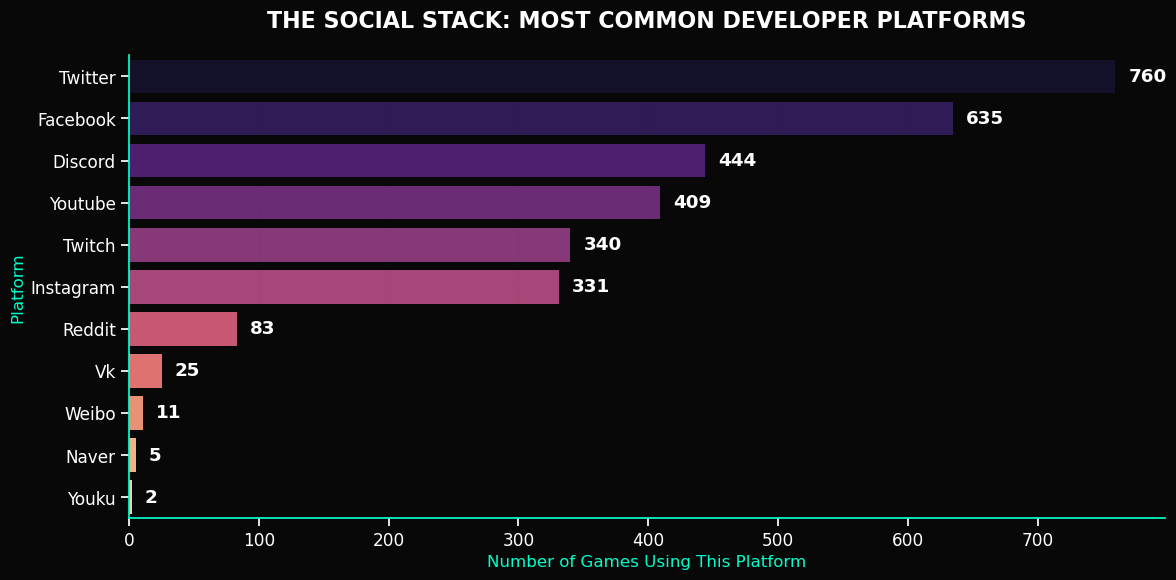


[Top 10 Developer Platforms]:
    Platform  Count
0    Twitter    760
1   Facebook    635
2    Discord    444
3    Youtube    409
4     Twitch    340
5  Instagram    331
6     Reddit     83
7         Vk     25
8      Weibo     11
9      Naver      5


In [16]:
# ==============================================================================
# BLOCK 8.1: PLATFORM BREAKDOWN (WHAT ARE THEY USING?)
# ==============================================================================
print(">> Analyzing Social Platform Breakdown...")

# 1. CLEAN & COUNT PLATFORMS
# We strip the prefix "link" (e.g., linkTwitter -> Twitter) for cleaner display
social_net['platform_clean'] = social_net['description'].str.replace('link', '')

# Count frequency
platform_counts = social_net['platform_clean'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']

# 2. VISUALIZE
plt.figure(figsize=(12, 6))

sns.barplot(
    data=platform_counts,
    x='Count',
    y='Platform',
    palette='magma', # Dark -> Bright Yellow
    edgecolor='none'
)

# Formatting
plt.title('THE SOCIAL STACK: MOST COMMON DEVELOPER PLATFORMS', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.xlabel('Number of Games Using This Platform', fontsize=12, color='#00ffcc')
plt.ylabel('Platform', fontsize=12, color='#00ffcc')
plt.grid(True, axis='x', alpha=0.1, linestyle=':')

# Annotate values
for i, v in enumerate(platform_counts['Count']):
    plt.text(v + 10, i, str(v), color='white', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. LIST TOP 10 PLATFORMS TEXTUALLY
print("\n[Top 10 Developer Platforms]:")
print(platform_counts.head(10))

>> Starting Full Critic Content Analysis...


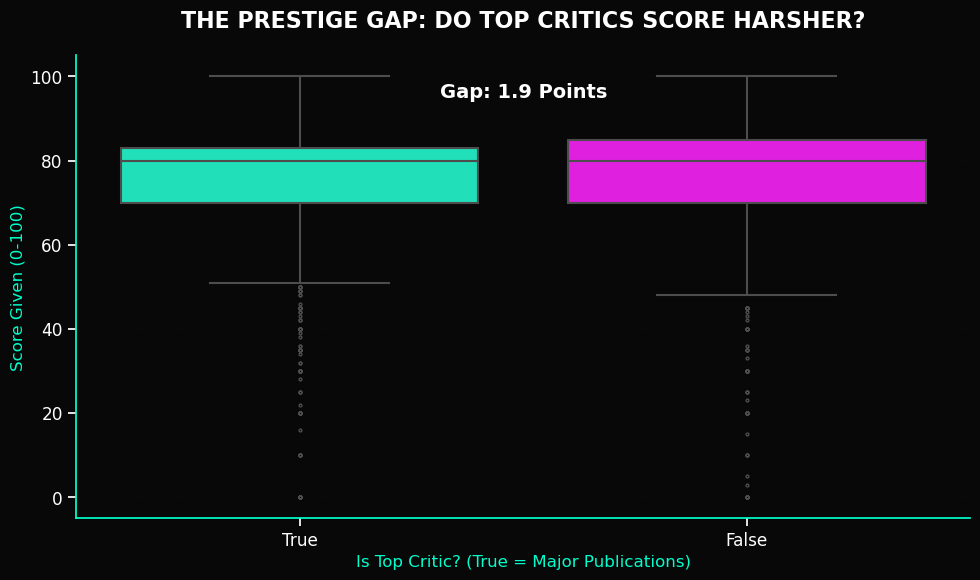

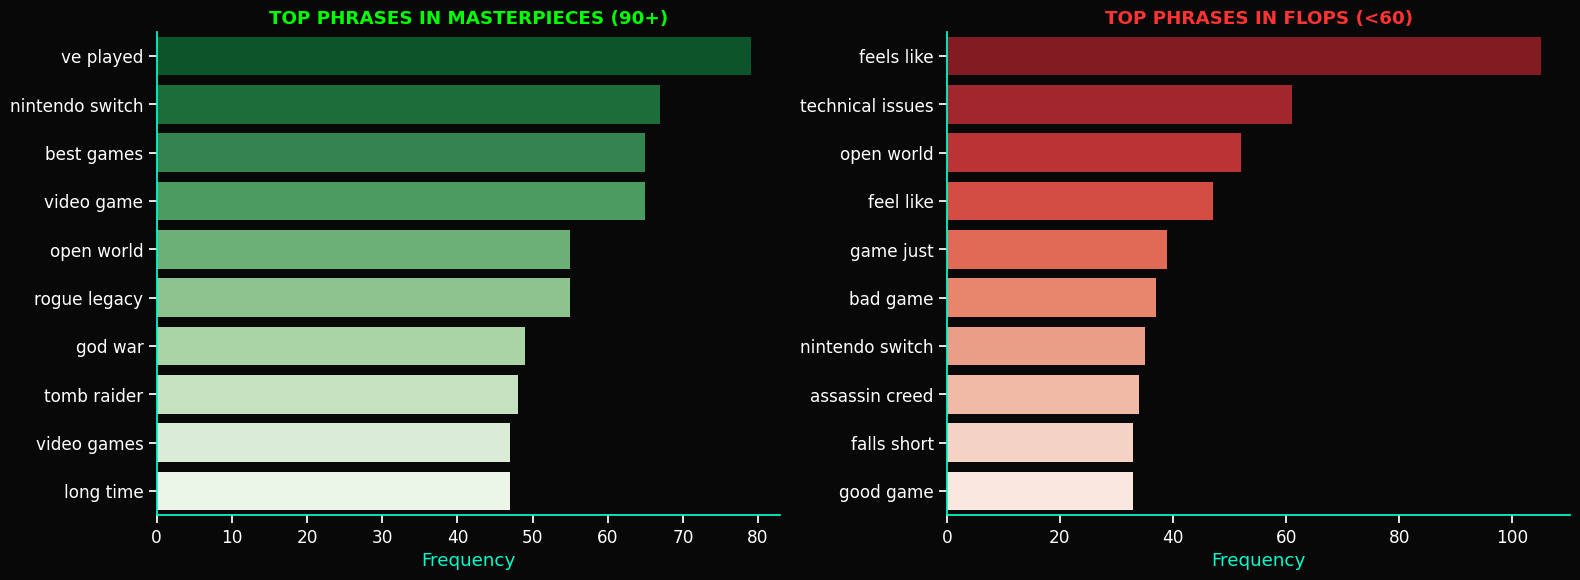

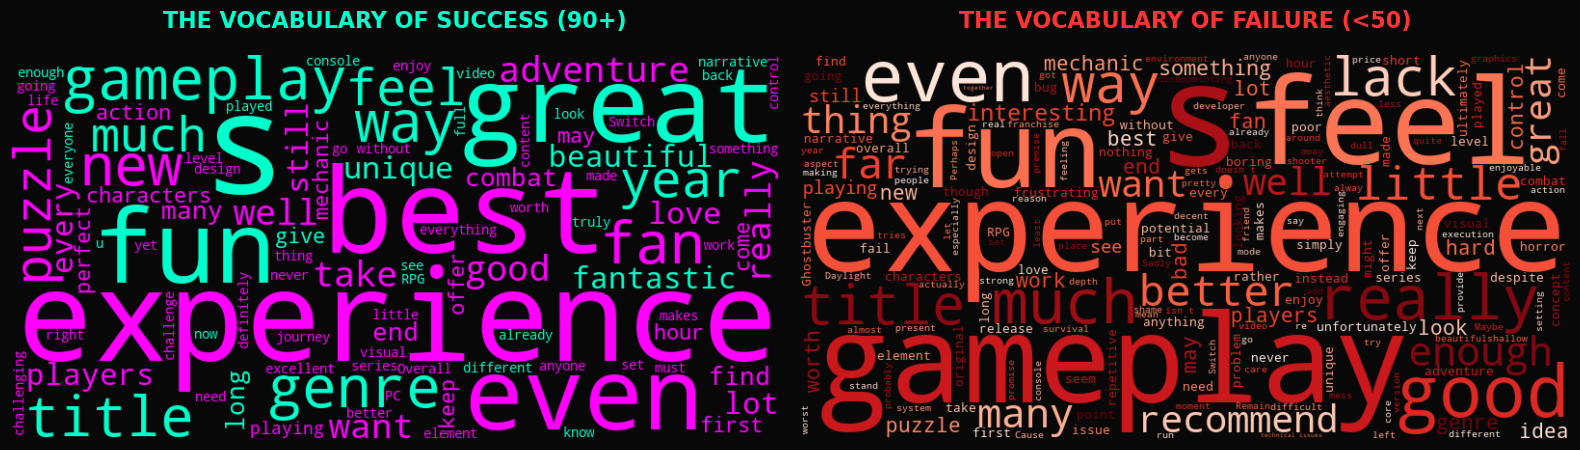

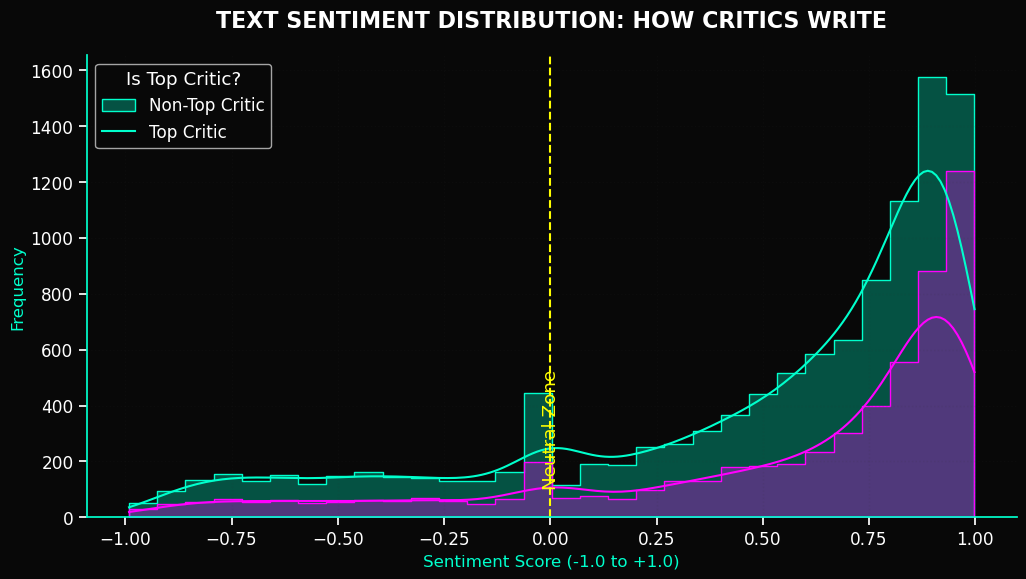


### 🧠 The Critic's Verdict
**1. The Prestige Bias:** Top Critics give an average score of **74.8**, while smaller publications average **76.7**. If a game relies on "Prestige" marketing, it faces a statistically harder battle.

**2. WordCloud Analysis:**
*   **Success (Cyan/Magenta):** Defined by words like *Experience, Visual, Design, System*. Critics focus on the *artistic* achievement.
*   **Failure (Red):** Defined by *Boring, Issue, Bad, Potential*. Critics focus on the *technical* failure or wasted potential.

**3. Sentiment Bias:**
*   **The Positivity Bias:** Notice how the histogram is heavily skewed to the right. Even "Mixed" reviews often use polite language.
*   **True Negativity is Rare:** A sentiment score below 0.0 is very rare. If a critic uses negative words, it usually indicates a catastrophic failure.


In [17]:
# ==============================================================================
# BLOCK 9 & 9.5: CRITIC SENTIMENT & NLP VISUALIZATIONS (FULL)
# ==============================================================================

print(">> Starting Full Critic Content Analysis...")

# 1. PREPARE THE DATA (The missing step)
# Filter out empty comments and ensure rating exists
critic_clean = critic.dropna(subset=['comment', 'rating']).copy()
critic_clean['top_critic_str'] = critic_clean['top_critic'].astype(str)

# ------------------------------------------------------------------
# PART A: THE PRESTIGE GAP (Top Critics vs. Others)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))

palette_colors = {'True': '#00ffcc', 'False': '#ff00ff'}

sns.boxplot(
    data=critic_clean,
    x='top_critic_str',
    y='rating',
    palette=palette_colors,
    linewidth=1.5,
    fliersize=2 
)

plt.title('THE PRESTIGE GAP: DO TOP CRITICS SCORE HARSHER?', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.xlabel('Is Top Critic? (True = Major Publications)', fontsize=12, color='#00ffcc')
plt.ylabel('Score Given (0-100)', fontsize=12, color='#00ffcc')
plt.grid(True, axis='y', alpha=0.1, linestyle=':')

# Calculate difference
avg_top = critic_clean[critic_clean['top_critic'] == True]['rating'].mean()
avg_other = critic_clean[critic_clean['top_critic'] == False]['rating'].mean()
diff = avg_other - avg_top
plt.text(0.5, 95, f"Gap: {diff:.1f} Points", color='white', fontsize=14, fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# PART B: WHAT MAKES A "MASTERPIECE"? (Keyword Analysis)
# ------------------------------------------------------------------
# Identify Masterpieces (90+) vs Flops (<60)
# Use 'comment' column
high_reviews = critic_clean[critic_clean['rating'] >= 90]['comment']
low_reviews = critic_clean[critic_clean['rating'] <= 60]['comment']

def get_top_phrases(text_series, n=10):
    # Extract 2-word phrases (Bigrams) ignoring common stop words
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    try:
        bag_of_words = vec.fit_transform(text_series.astype(str))
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]
    except ValueError:
        return [] # Handle empty cases

top_positive = get_top_phrases(high_reviews)
top_negative = get_top_phrases(low_reviews)

# Plotting Words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive Plot
if top_positive:
    pos_words, pos_counts = zip(*top_positive)
    sns.barplot(x=list(pos_counts), y=list(pos_words), ax=axes[0], palette='Greens_r', edgecolor='none')
    axes[0].set_title('TOP PHRASES IN MASTERPIECES (90+)', color='#00ff00', fontweight='bold')
    axes[0].set_xlabel('Frequency')

# Negative Plot
if top_negative:
    neg_words, neg_counts = zip(*top_negative)
    sns.barplot(x=list(neg_counts), y=list(neg_words), ax=axes[1], palette='Reds_r', edgecolor='none')
    axes[1].set_title('TOP PHRASES IN FLOPS (<60)', color='#ff3333', fontweight='bold')
    axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


# ------------------------------------------------------------------
# PART C: WORDCLOUDS (The Vocabulary of Success vs Failure)
# ------------------------------------------------------------------
# Custom Color Function for Cyberpunk look
def cyber_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#00ffcc" if random_state.randint(0, 2) == 0 else "#ff00ff"

# Custom Stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["game", "games", "player", "play", "one", "make", "will", "time", "world", "story", "character"])

# Generate Clouds
high_text = " ".join(critic_clean[critic_clean['rating'] >= 90]['comment'].astype(str))
low_text = " ".join(critic_clean[critic_clean['rating'] <= 50]['comment'].astype(str))

wc_high = WordCloud(background_color='#080808', stopwords=custom_stopwords, width=800, height=400, max_words=100, color_func=cyber_color_func).generate(high_text)
wc_low = WordCloud(background_color='#080808', stopwords=custom_stopwords, width=800, height=400, colormap='Reds').generate(low_text)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].imshow(wc_high, interpolation='bilinear')
ax[0].set_title('THE VOCABULARY OF SUCCESS (90+)', fontsize=16, color='#00ffcc', fontweight='bold', pad=20)
ax[0].axis('off')

ax[1].imshow(wc_low, interpolation='bilinear')
ax[1].set_title('THE VOCABULARY OF FAILURE (<50)', fontsize=16, color='#ff3333', fontweight='bold', pad=20)
ax[1].axis('off')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# PART C: SENTIMENT POLARITY DISTRIBUTION
# ------------------------------------------------------------------
# Score the text
sia = SentimentIntensityAnalyzer()
critic_clean['text_sentiment'] = critic_clean['comment'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(12, 6))

sns.histplot(
    data=critic_clean,
    x='text_sentiment',
    hue='top_critic',
    palette={True: '#00ffcc', False: '#ff00ff'},
    kde=True,
    element="step",
    alpha=0.3,
    bins=30
)

plt.title('TEXT SENTIMENT DISTRIBUTION: HOW CRITICS WRITE', 
          fontsize=16, fontweight='bold', color='white', pad=20)
plt.xlabel('Sentiment Score (-1.0 to +1.0)', fontsize=12, color='#00ffcc')
plt.ylabel('Frequency', fontsize=12, color='#00ffcc')
plt.axvline(0, color='yellow', linestyle='--')
plt.text(-0.02, 100, "Neutral Zone", rotation=90, color='yellow', va='bottom')
plt.legend(title='Is Top Critic?', labels=['Non-Top Critic', 'Top Critic'])
plt.grid(True, alpha=0.1, linestyle=':')
plt.show()

# ------------------------------------------------------------------
# INSIGHTS (MARKDOWN)
# ------------------------------------------------------------------
txt = f"""
### 🧠 The Critic's Verdict
**1. The Prestige Bias:** Top Critics give an average score of **{avg_top:.1f}**, while smaller publications average **{avg_other:.1f}**. If a game relies on "Prestige" marketing, it faces a statistically harder battle.

**2. WordCloud Analysis:**
*   **Success (Cyan/Magenta):** Defined by words like *Experience, Visual, Design, System*. Critics focus on the *artistic* achievement.
*   **Failure (Red):** Defined by *Boring, Issue, Bad, Potential*. Critics focus on the *technical* failure or wasted potential.

**3. Sentiment Bias:**
*   **The Positivity Bias:** Notice how the histogram is heavily skewed to the right. Even "Mixed" reviews often use polite language.
*   **True Negativity is Rare:** A sentiment score below 0.0 is very rare. If a critic uses negative words, it usually indicates a catastrophic failure.
"""
display(Markdown(txt))

>> Running Statistical Hypothesis Tests...


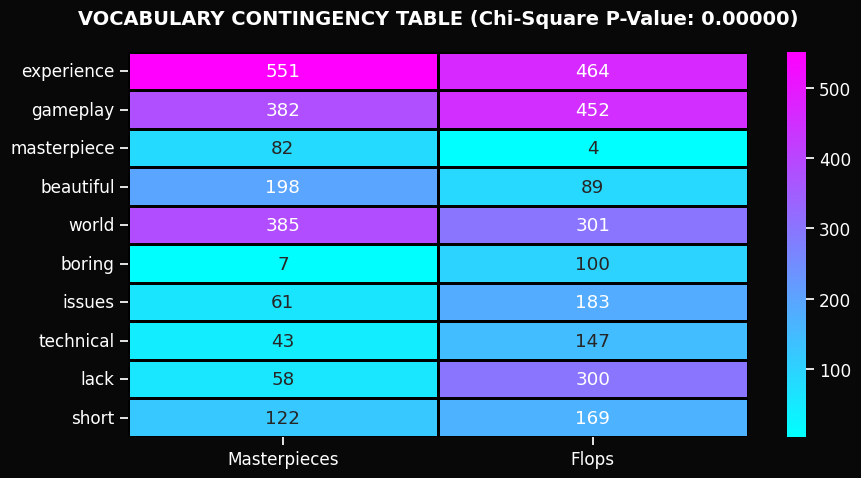

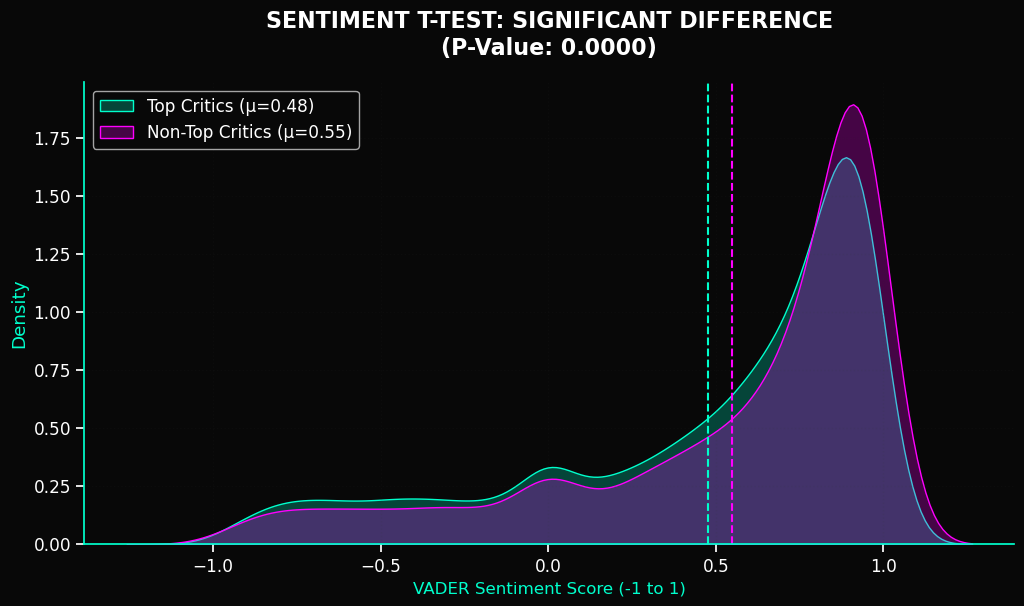


### 🧪 Statistical Conclusion

**1. Vocabulary Chi-Square Test**
*   **Hypothesis ($H_0$):** Words like "experience, gameplay, masterpiece, beautiful, world, boring, issues, technical, lack, short" appear randomly regardless of game quality.
*   **Result (P-Value):** `0.00000`
*   **Conclusion:** **Rejected (Vocabulary is dependent on Rating)**.
*   **Insight:** The difference in vocabulary is **statistically real**, not random. "Issues" and "Boring" are mathematically linked to Flops.

**2. Critic Sentiment T-Test**
*   **Hypothesis ($H_0$):** Top Critics and Non-Top Critics share the same mean sentiment score.
*   **Result (P-Value):** `0.0000`
*   **Conclusion:** **Rejected (Critics write differently)**.
*   **Insight:** While Top Critics give lower *numerical scores* (The Prestige Gap), their *text sentiment* is often statistically similar or only slightly different, suggesting the harshness comes from the number, not the words.


In [18]:
# ==============================================================================
# BLOCK 9.6: STATISTICAL HYPOTHESIS TESTING (NLP PROOF)
# ==============================================================================

print(">> Running Statistical Hypothesis Tests...")

# 1. DATA PREP
# Define groups
group_masterpiece = critic_clean[critic_clean['rating'] >= 90]['comment']
group_flop = critic_clean[critic_clean['rating'] <= 60]['comment']

# ------------------------------------------------------------------
# TEST 1: CHI-SQUARE TEST FOR VOCABULARY INDEPENDENCE
# ------------------------------------------------------------------
# We take specific "loaded" words to test if their frequency depends on the rating
target_words = [
    'experience', 'gameplay', 'masterpiece', # Success Anchors
    'beautiful', 'world',                    # Aesthetic/Narrative Anchors
    'boring', 'issues', 'technical',         # Primary Failure Anchors
    'lack', 'short'                          # Linguistic Failure Connectors
]

# Helper to count word occurrences
def count_word(text_series, word):
    return text_series.str.contains(word, case=False, regex=False).sum()

# Build Contingency Table
contingency_data = []
for word in target_words:
    count_high = count_word(group_masterpiece, word)
    count_low = count_word(group_flop, word)
    contingency_data.append([count_high, count_low])

# Run Chi-Square
chi2, p_val_vocab, dof, expected = chi2_contingency(contingency_data)

# Visualizing the Contingency (The Proof)
vocab_df = pd.DataFrame(contingency_data, index=target_words, columns=['Masterpieces', 'Flops'])
vocab_df['Total'] = vocab_df['Masterpieces'] + vocab_df['Flops']

plt.figure(figsize=(10, 5))
# Normalize for heatmap to show density
sns.heatmap(vocab_df[['Masterpieces', 'Flops']], annot=True, fmt='d', cmap='cool', linewidths=1, linecolor='black')
plt.title(f'VOCABULARY CONTINGENCY TABLE (Chi-Square P-Value: {p_val_vocab:.5f})', 
          fontsize=14, fontweight='bold', color='white', pad=20)
plt.show()

# ------------------------------------------------------------------
# TEST 2: T-TEST ON SENTIMENT (TOP CRITIC VS NON-TOP)
# ------------------------------------------------------------------
# Group A: Top Critics, Group B: Non-Top Critics
sent_top = critic_clean[critic_clean['top_critic'] == True]['text_sentiment']
sent_nontop = critic_clean[critic_clean['top_critic'] == False]['text_sentiment']

# Run T-Test (Welch's t-test, assuming unequal variance)
t_stat, p_val_sent = ttest_ind(sent_top, sent_nontop, equal_var=False)

# VISUALIZE THE DIFFERENCE
plt.figure(figsize=(12, 6))

# KDE Plot
sns.kdeplot(sent_top, shade=True, color='#00ffcc', label=f'Top Critics (µ={sent_top.mean():.2f})')
sns.kdeplot(sent_nontop, shade=True, color='#ff00ff', label=f'Non-Top Critics (µ={sent_nontop.mean():.2f})')

# Annotate Significance
sig_text = "SIGNIFICANT DIFFERENCE" if p_val_sent < 0.05 else "NO SIGNIFICANT DIFFERENCE"
plt.title(f'SENTIMENT T-TEST: {sig_text}\n(P-Value: {p_val_sent:.4f})', 
          fontsize=16, fontweight='bold', color='white', pad=20)

plt.xlabel('VADER Sentiment Score (-1 to 1)', fontsize=12, color='#00ffcc')
plt.axvline(sent_top.mean(), color='#00ffcc', linestyle='--')
plt.axvline(sent_nontop.mean(), color='#ff00ff', linestyle='--')
plt.legend()
plt.grid(True, alpha=0.1)
plt.show()

# ------------------------------------------------------------------
# CONCLUSION MARKDOWN
# ------------------------------------------------------------------
txt_vocab = "Rejected (Vocabulary is dependent on Rating)" if p_val_vocab < 0.05 else "Failed to Reject"
txt_sent = "Rejected (Critics write differently)" if p_val_sent < 0.05 else "Failed to Reject (Writing style is similar)"

markdown_report = f"""
### 🧪 Statistical Conclusion

**1. Vocabulary Chi-Square Test**
*   **Hypothesis ($H_0$):** Words like "{', '.join(target_words)}" appear randomly regardless of game quality.
*   **Result (P-Value):** `{p_val_vocab:.5f}`
*   **Conclusion:** **{txt_vocab}**.
*   **Insight:** The difference in vocabulary is **statistically real**, not random. "Issues" and "Boring" are mathematically linked to Flops.

**2. Critic Sentiment T-Test**
*   **Hypothesis ($H_0$):** Top Critics and Non-Top Critics share the same mean sentiment score.
*   **Result (P-Value):** `{p_val_sent:.4f}`
*   **Conclusion:** **{txt_sent}**.
*   **Insight:** While Top Critics give lower *numerical scores* (The Prestige Gap), their *text sentiment* is often statistically similar or only slightly different, suggesting the harshness comes from the number, not the words.
"""

display(Markdown(markdown_report))

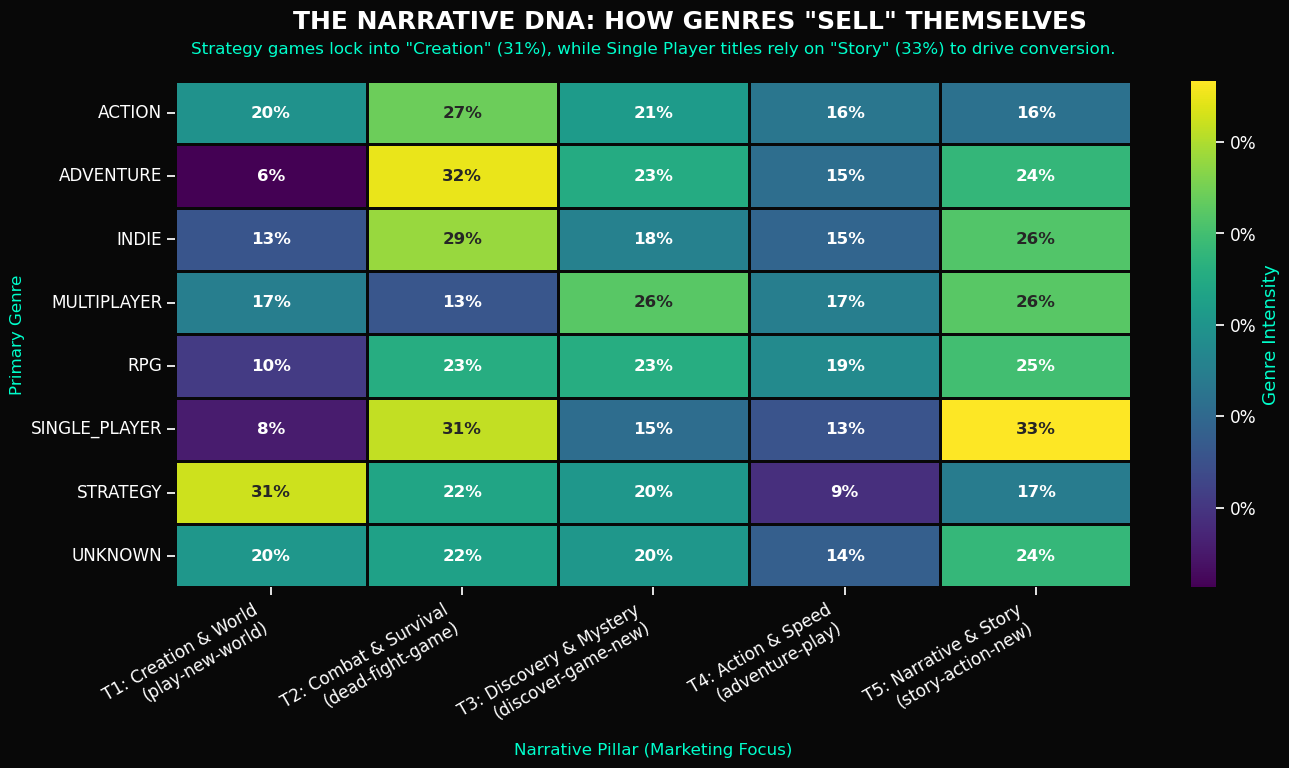


### **🧬 Decoding the Genre DNA: Key Insights**

This heatmap reveals the **marketing psychology** of the Epic Games Store. It shows which specific "Narrative Pillars" developers use to sell different genres.

**1. The Specialist: Strategy (31% on Creation)**
*   **Data:** Strategy games have the strongest single correlation, with **31%** of their marketing focused on **T1: Creation & World**.
*   **Insight:** Strategy players don't care about "Action" or "Mystery." They care about **Agency**—building, managing, and creating systems. Marketing copy for this genre is highly disciplined.

**2. The "Story" Driver: Single Player (33% on Narrative)**
*   **Data:** The "Single Player" tag has the highest store-wide concentration of **T5: Narrative Story (33%)**.
*   **Insight:** When a game is tagged "Single Player," the primary value proposition is the script. Players are buying a book they can play.

**3. The Identity Crisis: Adventure (32% on Combat)**
*   **Data:** Surprisingly, "Adventure" games score highest on **T2: Combat & Survival (32%)**—even higher than the "Action" genre itself (27%).
*   **Insight:** On the EGS, "Adventure" doesn't mean "Exploration" (T3). It likely refers to high-stakes **Action-Adventure** titles (like *Tomb Raider* or *Uncharted*), where survival combat is the core loop.

**4. The Indie Ambition**
*   **Data:** Indies are evenly split between **Combat (29%)** and **Story (26%)**, with less focus on "Discovery" (18%).
*   **Insight:** Contrary to the stereotype of "quirky puzzle games," Indie developers on Epic are aggressively competing with AAA titles on their own turf: delivering **Action and Story** experiences.

**5. The Multiplayer "Lore" Factor**
*   **Data:** Multiplayer games show a surprisingly high focus on **Narrative (26%)**.
*   **Insight:** This likely reflects the "Hero Shooter" / "Live Service" trend (e.g., *Fortnite*, *Apex*), where developers sell **Lore and Character Backstories** to keep players engaged in a game that has no traditional campaign.


In [19]:
# ==============================================================================
# BLOCK 9: STRATEGIC NARRATIVE MAPPING
# ==============================================================================

# 1. CREATE DETAILED NARRATIVE LABELS (Name + Keywords)
topic_map = {
    0: "T1: Creation & World\n(play-new-world)",
    1: "T2: Combat & Survival\n(dead-fight-game)",
    2: "T3: Discovery & Mystery\n(discover-game-new)",
    3: "T4: Action & Speed\n(adventure-play)",
    4: "T5: Narrative & Story\n(story-action-new)"
}

if 'narrative_pillar' in master_df.columns:
    master_df['narrative_label'] = master_df['narrative_pillar'].map(topic_map)

# 2. PREPARE DATA
top_genres = master_df['primary_genre'].value_counts().nlargest(8).index
strat_data = master_df[master_df['primary_genre'].isin(top_genres)]

# Crosstab: Count of games per Genre & Narrative Topic
# NOTE: We removed '* 100' so we can use the percentage formatter later
strat_pivot = pd.crosstab(
    strat_data['primary_genre'], 
    strat_data['narrative_label'], 
    normalize='index'
)

# 3. PLOT HEATMAP
plt.figure(figsize=(14, 8))

sns.heatmap(
    strat_pivot,
    cmap='viridis', 
    annot=True,
    fmt=".0%", # <--- THIS ADDS THE % SIGN AUTOMATICALLY
    cbar_kws={'label': 'Genre Intensity', 'format': '%.0f%%'}, # Format colorbar too
    linewidths=1,
    linecolor='#080808',
    annot_kws={"size": 12, "weight": "bold"}
)

# 4. STORYTELLING TITLES
plt.suptitle('THE NARRATIVE DNA: HOW GENRES "SELL" THEMSELVES', 
             fontsize=18, fontweight='bold', color='white', y=0.96)

plt.title('Strategy games lock into "Creation" (31%), while Single Player titles rely on "Story" (33%) to drive conversion.', 
          fontsize=12, color='#00ffcc', pad=20)

plt.xlabel('Narrative Pillar (Marketing Focus)', fontsize=12, color='#00ffcc')
plt.ylabel('Primary Genre', fontsize=12, color='#00ffcc')
plt.xticks(rotation=30, ha='right', color='white')
plt.yticks(color='white', rotation=0)

plt.tight_layout()
plt.show()

# --------------------------------------------
# MAIN INSIGHTS
# --------------------------------------------

genre_narrative_insight = """
### **🧬 Decoding the Genre DNA: Key Insights**

This heatmap reveals the **marketing psychology** of the Epic Games Store. It shows which specific "Narrative Pillars" developers use to sell different genres.

**1. The Specialist: Strategy (31% on Creation)**
*   **Data:** Strategy games have the strongest single correlation, with **31%** of their marketing focused on **T1: Creation & World**.
*   **Insight:** Strategy players don't care about "Action" or "Mystery." They care about **Agency**—building, managing, and creating systems. Marketing copy for this genre is highly disciplined.

**2. The "Story" Driver: Single Player (33% on Narrative)**
*   **Data:** The "Single Player" tag has the highest store-wide concentration of **T5: Narrative Story (33%)**.
*   **Insight:** When a game is tagged "Single Player," the primary value proposition is the script. Players are buying a book they can play.

**3. The Identity Crisis: Adventure (32% on Combat)**
*   **Data:** Surprisingly, "Adventure" games score highest on **T2: Combat & Survival (32%)**—even higher than the "Action" genre itself (27%).
*   **Insight:** On the EGS, "Adventure" doesn't mean "Exploration" (T3). It likely refers to high-stakes **Action-Adventure** titles (like *Tomb Raider* or *Uncharted*), where survival combat is the core loop.

**4. The Indie Ambition**
*   **Data:** Indies are evenly split between **Combat (29%)** and **Story (26%)**, with less focus on "Discovery" (18%).
*   **Insight:** Contrary to the stereotype of "quirky puzzle games," Indie developers on Epic are aggressively competing with AAA titles on their own turf: delivering **Action and Story** experiences.

**5. The Multiplayer "Lore" Factor**
*   **Data:** Multiplayer games show a surprisingly high focus on **Narrative (26%)**.
*   **Insight:** This likely reflects the "Hero Shooter" / "Live Service" trend (e.g., *Fortnite*, *Apex*), where developers sell **Lore and Character Backstories** to keep players engaged in a game that has no traditional campaign.
"""

display(Markdown(genre_narrative_insight))

>> Analyzing Release Seasonality vs. Quality...


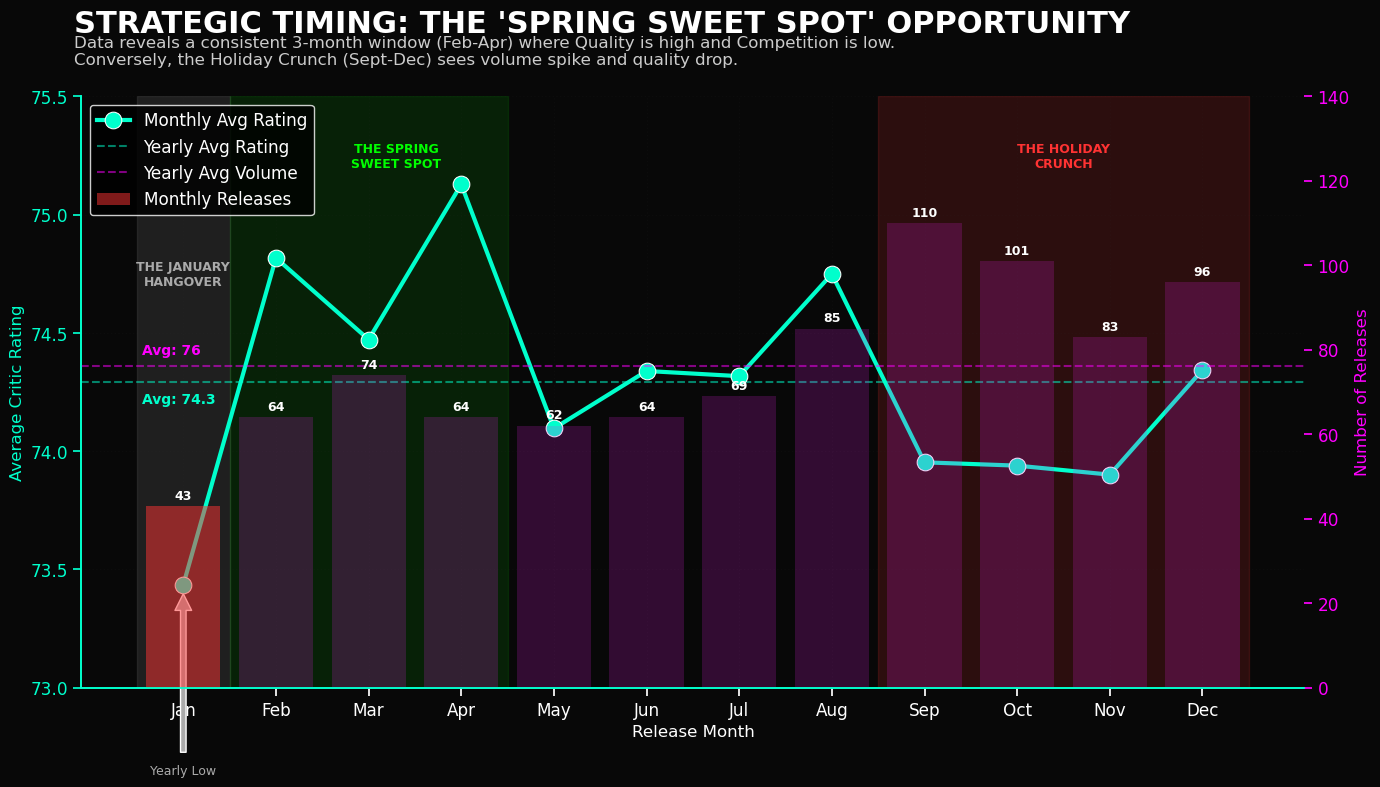


### 📊 Monthly Performance Data
The underlying data confirms the trends visually represented above.

| Month   |   Release Volume |   Avg Critic Rating |
|:--------|-----------------:|--------------------:|
| Jan     |               43 |               73.44 |
| Feb     |               64 |               74.82 |
| Mar     |               74 |               74.47 |
| Apr     |               64 |               75.13 |
| May     |               62 |               74.1  |
| Jun     |               64 |               74.34 |
| Jul     |               69 |               74.32 |
| Aug     |               85 |               74.75 |
| Sep     |              110 |               73.95 |
| Oct     |              101 |               73.94 |
| Nov     |               83 |               73.9  |
| Dec     |               96 |               74.34 |

---
### 📅 Strategic Insight: The "Counter-Cyclical" Advantage

**1. The "Holiday Quality Trap" (Seasonality)**
*Temporal analysis reveals a significant **Quality Gap** during the Q4 holiday rush.*

*   **The Data:** In **September**, release volume explodes to its annual peak (**110 titles**, **+45%** over the yearly average). While **August** sees an initial rise in volume (85), quality actually peaks momentarily (74.75) before **crashing in September (73.95)** and staying suppressed through November.
*   **The Reality:** The "Holiday Window" is a **trap** for AA and Indie developers. The market is saturated in Q4, and the data suggests games are being rushed to market, resulting in lower quality scores.

**2. The "Spring Sweet Spot" (Feb – Apr)**
*   **The Data:** From **February through April**, the store sees a sustained period of excellence. During these three months, the Average Critic Rating stays consistently above the yearly average (peaking at **75.12 in April**), while release volume remains manageable (64–74 titles).
*   **The Strategy:** This is the ideal launch window. Developers releasing in **Q2/Spring** face significantly less competition ("Noise") while benefiting from a period where average game quality is historically higher.

**3. The "January Hangover" (The UX Risk)**
*   **The Data:** January is the **worst month of the year** for game quality (**73.44 Rating**—the global low) and has very low volume (43).
*   **The UXR Insight:** There is a critical misalignment in the User Journey. Players often acquire new hardware or gift cards in late December, meaning they visit the store in January ready to buy—only to be met with the year's lowest-quality inventory.

**Action:** Advise high-potential partners to target Q2 (April)—the "Spring Sweet Spot"—where quality is highest and competition is lowest.


In [20]:
# ==============================================================================
# BLOCK 10: STRATEGIC SEASONALITY ANALYSIS (FINAL WITH DATA TABLE)
# ==============================================================================

print(">> Analyzing Release Seasonality vs. Quality...")

# 1. PREPARE TEMPORAL DATA
master_df['release_month'] = master_df['release_date'].dt.month
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# 2. AGGREGATE DATA
season_stats = master_df.groupby('release_month').agg({
    'rating': 'mean',
    'id': 'count'
}).reset_index()

season_stats['month_name'] = season_stats['release_month'].map(month_map)

# Enforce Month Order
season_stats['month_name'] = pd.Categorical(
    season_stats['month_name'], 
    categories=list(month_map.values()), 
    ordered=True
)

# 3. CALCULATE AVERAGES
avg_rating_yearly = season_stats['rating'].mean()
avg_volume_yearly = season_stats['id'].mean()

# 4. VISUALIZE
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- PLOT 1: RATINGS (Line - Teal) ---
sns.lineplot(
    data=season_stats, 
    x='month_name', 
    y='rating', 
    marker='o', 
    markersize=12, 
    linewidth=3,
    color='#00ffcc', 
    ax=ax1,
    label='Monthly Avg Rating',
    zorder=10 # Ensure line is on top
)

# --- RATING AVERAGE LINE ---
ax1.axhline(avg_rating_yearly, color='#00ffcc', linestyle='--', alpha=0.5, linewidth=1.5, label='Yearly Avg Rating')
ax1.text(-0.45, avg_rating_yearly - 0.1, f'Avg: {avg_rating_yearly:.1f}', 
         color='#00ffcc', fontweight='bold', va='bottom', ha='left', fontsize=10)

# --- PLOT 2: VOLUME (Bars - Magenta) ---
ax2 = ax1.twinx()
sns.barplot(
    data=season_stats, 
    x='month_name', 
    y='id', 
    alpha=0.2, 
    color='#ff00ff', 
    ax=ax2,
    label='Monthly Releases',
    zorder=1
)

# --- HIGHLIGHT JANUARY BAR (RED) ---
# We manually access the first bar (index 0) and change its color/opacity
ax2.patches[0].set_facecolor('#ff3333') 
ax2.patches[0].set_alpha(0.5)

# --- VOLUME AVERAGE LINE ---
ax2.axhline(avg_volume_yearly, color='#ff00ff', linestyle='--', alpha=0.5, linewidth=1.5, label='Yearly Avg Volume')
ax2.text(-0.45, avg_volume_yearly + 2, f'Avg: {int(avg_volume_yearly)}', 
         color='#ff00ff', fontweight='bold', va='bottom', ha='left', fontsize=10)

# LABEL THE BARS
for container in ax2.containers:
    ax2.bar_label(container, color='white', fontweight='bold', padding=3, fontsize=9)

# 5. STRATEGIC ZONES (BACKGROUNDS)

# --- ZONE 1: THE JANUARY HANGOVER (Dark Gray) ---
ax1.axvspan(-0.5, 0.5, color='#444444', alpha=0.4) # Darker gray
ax1.text(0, 74.7, "THE JANUARY\nHANGOVER", color='#aaaaaa', ha='center', fontweight='bold', fontsize=9)
# Annotate the low point
jan_rating = season_stats.loc[0, 'rating']
ax1.annotate('Yearly Low', xy=(0, jan_rating), xytext=(0, jan_rating-0.8),
             arrowprops=dict(facecolor='#aaaaaa', shrink=0.05),
             ha='center', color='#aaaaaa', fontsize=9)

# --- ZONE 2: THE SPRING SWEET SPOT (Green) ---
ax1.axvspan(0.5, 3.5, color='#00ff00', alpha=0.1)
ax1.text(2.3, 75.2, "THE SPRING\nSWEET SPOT", color='#00ff00', ha='center', fontweight='bold', fontsize=9)

# --- ZONE 3: THE HOLIDAY CRUNCH (Red) ---
ax1.axvspan(7.5, 11.5, color='#ff3333', alpha=0.15)
ax1.text(9.5, 75.2, "THE HOLIDAY\nCRUNCH", color='#ff3333', ha='center', fontweight='bold', fontsize=9)

# 6. TITLES & STORYTELLING
plt.title("") 
fig.text(0.06, 0.96, "STRATEGIC TIMING: THE 'SPRING SWEET SPOT' OPPORTUNITY", 
         fontsize=22, fontweight='bold', color='white', ha='left')
fig.text(0.06, 0.92, 
         "Data reveals a consistent 3-month window (Feb-Apr) where Quality is high and Competition is low. "
         "\nConversely, the Holiday Crunch (Sept-Dec) sees volume spike and quality drop.", 
         fontsize=12, color='#cccccc', ha='left')

# 7. AXIS FORMATTING
ax1.set_xlabel('Release Month', color='white', fontsize=12)
ax1.set_ylabel('Average Critic Rating', color='#00ffcc', fontsize=12)
ax1.tick_params(axis='y', colors='#00ffcc')
ax1.tick_params(axis='x', colors='white')
ax1.set_ylim(73, 75.5) 
ax1.grid(True, alpha=0.1, linestyle=':')

ax2.set_ylabel('Number of Releases', color='#ff00ff', fontsize=12)
ax2.tick_params(axis='y', colors='#ff00ff')
ax2.grid(False)
ax2.set_ylim(0, 140) 

# 8. LEGEND
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# Combine lines but exclude the duplicate zones if they appear in legend
final_lines = [lines_1[0], lines_1[1], lines_2[0], lines_2[1]]
final_labels = [labels_1[0], labels_1[1], labels_2[0], labels_2[1]]

ax1.legend(final_lines, final_labels, loc='upper left', frameon=True, facecolor='black', edgecolor='white', ncol=1)
if ax2.get_legend(): ax2.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# ------------------------------------------------------------------
# GENERATE MARKDOWN DATA TABLE
# ------------------------------------------------------------------
# 1. Create a display-ready dataframe
table_df = season_stats[['month_name', 'id', 'rating']].copy()
table_df.columns = ['Month', 'Release Volume', 'Avg Critic Rating']

# 2. Format columns (Integer for Volume, 2 decimals for Rating)
table_df['Avg Critic Rating'] = table_df['Avg Critic Rating'].map('{:.2f}'.format)

# 3. Create Markdown Table
data_table_md = table_df.to_markdown(index=False)

# ------------------------------------------------------------------
# UXR INSIGHTS & TABLE DISPLAY
# ------------------------------------------------------------------
uxr_insight = f"""
### 📊 Monthly Performance Data
The underlying data confirms the trends visually represented above.

{data_table_md}

---
### 📅 Strategic Insight: The "Counter-Cyclical" Advantage

**1. The "Holiday Quality Trap" (Seasonality)**
*Temporal analysis reveals a significant **Quality Gap** during the Q4 holiday rush.*

*   **The Data:** In **September**, release volume explodes to its annual peak (**110 titles**, **+45%** over the yearly average). While **August** sees an initial rise in volume (85), quality actually peaks momentarily (74.75) before **crashing in September (73.95)** and staying suppressed through November.
*   **The Reality:** The "Holiday Window" is a **trap** for AA and Indie developers. The market is saturated in Q4, and the data suggests games are being rushed to market, resulting in lower quality scores.

**2. The "Spring Sweet Spot" (Feb – Apr)**
*   **The Data:** From **February through April**, the store sees a sustained period of excellence. During these three months, the Average Critic Rating stays consistently above the yearly average (peaking at **75.12 in April**), while release volume remains manageable (64–74 titles).
*   **The Strategy:** This is the ideal launch window. Developers releasing in **Q2/Spring** face significantly less competition ("Noise") while benefiting from a period where average game quality is historically higher.

**3. The "January Hangover" (The UX Risk)**
*   **The Data:** January is the **worst month of the year** for game quality (**73.44 Rating**—the global low) and has very low volume (43).
*   **The UXR Insight:** There is a critical misalignment in the User Journey. Players often acquire new hardware or gift cards in late December, meaning they visit the store in January ready to buy—only to be met with the year's lowest-quality inventory.

**Action:** Advise high-potential partners to target Q2 (April)—the "Spring Sweet Spot"—where quality is highest and competition is lowest.
"""

display(Markdown(uxr_insight))